In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()
from api_core_functions import query_ctgov_field


In [2]:
dataframe = pd.read_csv("Data/Ctgov_DTX_Dataset.csv")



# Feature Encoding

In [3]:
dataframe["Locations"] = dataframe["Locations"].astype(str)
dataframe["Locations"] = dataframe["Locations"].str.split("|")

In [4]:
dataframe = dataframe[dataframe["start_year"] > 2004]
dataframe = dataframe[dataframe["start_year"] < 2023]

In [5]:
len(dataframe)


5796

In [6]:
dataframe["is_observational"] = "No"
dataframe["is_observational"][dataframe["Study Type"].str.contains("Observational")] = "Yes"
dataframe['is_observational'] = pd.Categorical(dataframe['is_observational'], [
                                                                                       "Yes", "No" ])

C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3059548450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["is_observational"][dataframe["Study Type"].str.contains("Observational")] = "Yes"


(array([7.06247843e-03, 4.56679323e-03, 2.36106317e-03, 1.12530204e-03,
        9.87228167e-04, 4.34932689e-04, 4.93614084e-04, 2.96858819e-04,
        3.34829134e-04, 2.03658958e-04, 2.55436659e-04, 1.13910942e-04,
        1.69140490e-04, 7.93924750e-05, 1.00103555e-04, 5.86813945e-05,
        7.59406282e-05, 2.76147739e-05, 4.83258543e-05, 1.20469451e-03]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

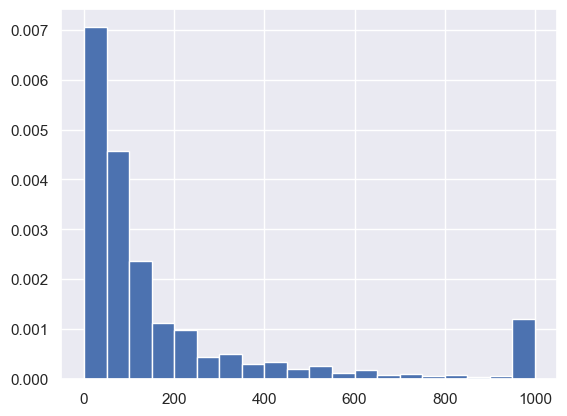

In [7]:
plt.hist(np.clip(dataframe.Enrollment, 0, 1000), bins=20, density=True)

In [8]:
dataframe["num_patient_category"] = np.nan
dataframe["num_patient_category"][dataframe["Enrollment"].between(0,100)] = "up to 100"
dataframe["num_patient_category"][dataframe["Enrollment"].between(101,250)] = "up to 250"
dataframe["num_patient_category"][dataframe["Enrollment"].between(251,1000)] = "up to 1000"
dataframe["num_patient_category"][dataframe["Enrollment"]>1000] = "more than 1000"
dataframe['num_patient_category'] = pd.Categorical(dataframe['num_patient_category'], [
                                                                                       'more than 1000', 'up to 1000', 
                                                                                       'up to 250', 'up to 100', ])
dataframe["num_patient_more_than_100"] = "Yes"
dataframe["num_patient_more_than_100"][dataframe["Enrollment"].between(0,100)] = "No"
dataframe['num_patient_more_than_100'] = pd.Categorical(dataframe['num_patient_more_than_100'], [
                                                                                       "Yes", "No" ])



C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3386831867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["num_patient_category"][dataframe["Enrollment"].between(0,100)] = "up to 100"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3386831867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["num_patient_category"][dataframe["Enrollment"].between(101,250)] = "up to 250"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3386831867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [9]:
dataframe["industry_funding"] = "No"
dataframe["industry_funding"][dataframe["Funded Bys"].str.contains("Industry")] = "Yes"
dataframe['industry_funding'] = pd.Categorical(dataframe['industry_funding'], [
                                                                                       "Yes", "No" ])


dataframe["industry_funding"] = "No"
dataframe["industry_funding"][dataframe["Funded Bys"].str.contains("Industry")] = "Yes"
dataframe['industry_funding'] = pd.Categorical(dataframe['industry_funding'], [
                                                                                       "Yes", "No" ])


dataframe["randomized"] = "No"
dataframe["randomized"][dataframe["Study Designs"].str.contains("Allocation: Randomized", na = False, case = False)] = "Yes"
dataframe['randomized'] = pd.Categorical(dataframe['randomized'], [
                                                                                       "Yes", "No" ])

dataframe["masked"] = "No"
search_for = ["Masking: Single", "Masking: Double", "Masking: Triple", "Masking: Quadruple", "Masking: Quintuple"]
dataframe["masked"][dataframe["Study Designs"].str.contains('|'.join(search_for), na = False, case = False)] = "Yes"
dataframe['masked'] = pd.Categorical(dataframe['masked'], [
                                                                                       "Yes", "No" ])


C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3904221446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["industry_funding"][dataframe["Funded Bys"].str.contains("Industry")] = "Yes"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3904221446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["industry_funding"][dataframe["Funded Bys"].str.contains("Industry")] = "Yes"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3904221446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [10]:
dataframe["masking_number"] = "None"
dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Single", na = False, case = False)] = "Single"
dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Double", na = False, case = False)] = "Double"
dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Triple", na = False, case = False)] = "Triple"
dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Quadruple", na = False, case = False)] = "Quadruple"
dataframe['masking_number'] = pd.Categorical(dataframe['masking_number'], [
                                                                                       "Quadruple", "Triple", "Double", "Single", "None" ])

C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\1676987178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Single", na = False, case = False)] = "Single"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\1676987178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["masking_number"][dataframe["Study Designs"].str.contains("Masking: Double", na = False, case = False)] = "Double"
C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\1676987178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
def country_mapper(our_loc_lists):
    if our_loc_lists == np.nan:
        return np.nan
    else:
        return list(set([val.split(",")[-1] for val in our_loc_lists]))
    
dataframe["Countries"] = dataframe["Locations"].apply(country_mapper)


In [12]:
def multicenter_mapper(centerlist):
    if centerlist == np.nan:
        return np.nan
    if len(centerlist) >1:
        return "Yes"
    else:
        return "No"
dataframe["multicenter"] = dataframe["Locations"].apply(multicenter_mapper)
dataframe['multicenter'] = pd.Categorical(dataframe['multicenter'], [
                                                                                       "Yes", "No" ])


In [13]:
def multicountry_mapper(country_set):
    if country_set == np.nan:
        return np.nan
    if len(country_set) >1:
        return "Yes"
    else:
        return "No"
dataframe["multi_country"] = dataframe["Countries"].apply(multicountry_mapper)
dataframe['multi_country'] = pd.Categorical(dataframe['multi_country'], [
                                                                                       "Yes", "No" ])

# Depict Basic Dataset Features

## All Studies Graphs

In [14]:
total_occurences_per_year= dataframe["start_year"].value_counts().sort_index().reset_index(drop=True)

line_graph_data_total = dataframe.groupby("start_year").agg({i:'value_counts' for i in [ "is_observational","industry_funding", "num_patient_more_than_100", "multicenter", "multi_country"]})
line_graph_data_total.reset_index(inplace=True)
line_graph_data_total.drop(line_graph_data_total.loc[line_graph_data_total['level_1']=="No"].index, inplace=True)
line_graph_data_total.drop("level_1", axis = 1, inplace = True)
line_graph_data_total.reset_index(inplace=True, drop = True)
line_graph_data_total["total"] = total_occurences_per_year
line_graph_data_total["is_observational_rate"] = round(line_graph_data_total["is_observational"]/line_graph_data_total["total"] *100, 2)
line_graph_data_total["num_patient_more_than_100_rate"] = round(line_graph_data_total["num_patient_more_than_100"]/line_graph_data_total["total"] *100, 2)
line_graph_data_total["industry_funding_rate"] = round(line_graph_data_total["industry_funding"]/line_graph_data_total["total"] *100, 2)
line_graph_data_total["multicenter_rate"] = round(line_graph_data_total["multicenter"]/line_graph_data_total["total"] *100, 2)
line_graph_data_total["multi_country_rate"] = round(line_graph_data_total["multi_country"]/line_graph_data_total["total"] *100, 2)
line_graph_data_total["median_enrollment"] = dataframe.groupby("start_year").agg({i:'median' for i in [ "Enrollment"]}).values


line_graph_data_total["start_year"] = line_graph_data_total["start_year"].astype(int)



In [15]:
dataframe.is_observational.value_counts()

No     5087
Yes     709
Name: is_observational, dtype: int64

### Study Types

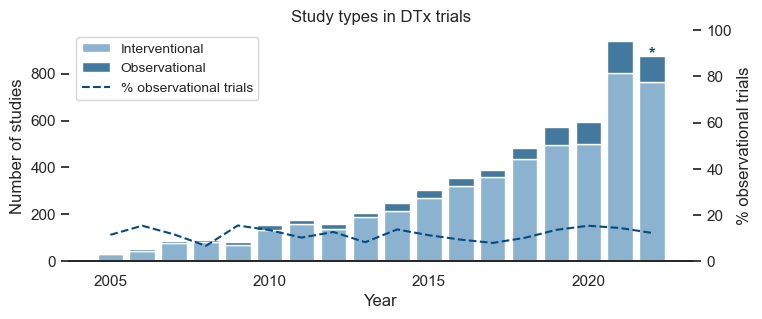

In [16]:
###Summary Graph with rate

fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[dataframe["start_year"].between(2005,2022)] , x = "start_year",
                  binwidth = 1, discrete = True, hue = "is_observational",
                  palette= [ "#044B7F", "#659ABF", ], multiple= "stack", shrink = 0.8)
ax.legend(["Interventional", "Observational",], fontsize = "small")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")


ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)], y = line_graph_data_total.is_observational_rate, color = "#044B7F", linestyle = "--",label = '% of all observational trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Interventional", "Observational",  '% observational trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% observational trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)
sns.despine(left = True)
plt.title("Study types in DTx trials")
plt.text(2022, 88, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/All_Studies_Study_type_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/All_Studies_Study_type_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Yearly Development

In [17]:
def trials_per_year_total(year):
    try:
        all_trials = query_ctgov_field(search_string="ALL", query_field="StartDate")
        all_trials["FieldValue"] = pd.to_datetime(all_trials["FieldValue"], infer_datetime_format=True)
        group = all_trials["FieldValue"].dt.to_period("Y")
        ref_df = all_trials.groupby([group]).agg("sum").reset_index()
        ref_df = all_trials.groupby(pd.Grouper(key="FieldValue", freq="Y")).sum()
        ref_df.drop("NStudiesWithValue", axis = 1, inplace = True)
        ref_df.reset_index(inplace = True)
        ref_df.rename(columns={"FieldValue": "year", "NStudiesFoundWithValue": "trial_count"}, inplace = True)
        ref_df["year"] = ref_df['year'].dt.normalize()

        ref_df.reset_index(inplace=True, drop=True)
        all_trials = ref_df["trial_count"][ref_df["year"] == f"{year}-12-31"]
        return all_trials.values[0]
    except Exception as e:
        print(e)
        return np.nan
    
line_graph_data_total["all_trials_that_year"]  = line_graph_data_total["start_year"].apply(trials_per_year_total)

In [18]:
line_graph_data_total["dtx_share_of_all_trials"] = round(100* line_graph_data_total["total"]/line_graph_data_total["all_trials_that_year"],2)

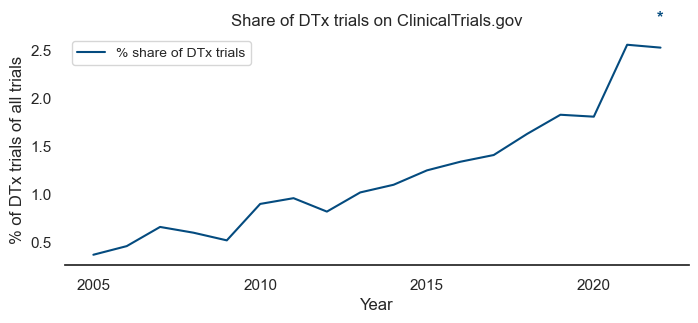

In [19]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")

sns.lineplot( x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)],
             y = line_graph_data_total.dtx_share_of_all_trials, color = "#044B7F", label = '% share of DTx trials')
plt.ylabel("% of DTx trials of all trials")
plt.xlabel("Year")
plt.legend(["% share of DTx trials",], fontsize = "small")
plt.text(2022, 2.8, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


sns.despine(left = True)
plt.title("Share of DTx trials on ClinicalTrials.gov")
plt.xticks([2005,2010,2015,2020])
plt.savefig('Graphs/CTGOV_DTX/DTx_share_per_year.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/DTx_share_per_year.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



### Study Subjects per Trial

In [20]:
print(line_graph_data_total)

    start_year  is_observational  industry_funding  num_patient_more_than_100  \
0         2005                 4                12                         17   
1         2006                 8                14                         27   
2         2007                10                31                         23   
3         2008                 6                30                         30   
4         2009                13                25                         37   
5         2010                21                47                         59   
6         2011                18                55                         73   
7         2012                20                35                         62   
8         2013                17                45                         73   
9         2014                34                62                         86   
10        2015                34                81                        111   
11        2016              

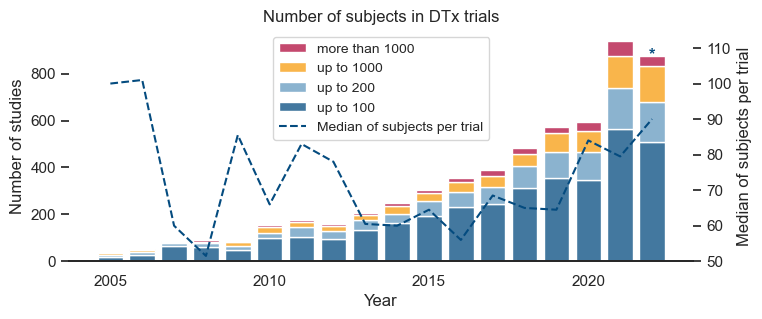

In [21]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[dataframe["start_year"].between(2005,2022)] , x = "start_year",
                  binwidth = 1, discrete = True, hue = "num_patient_category",
                  palette= ["#B00C3E", "#F89C0E","#659ABF", "#044B7F" ],
                  multiple= "stack", shrink = 0.8)
ax.legend(["up to 100", "up to 200", "up to 1000", "more than 1000"][::-1], fontsize = "small")
handles1=  ax.get_legend().legendHandles[::-1]
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)], y = line_graph_data_total.median_enrollment, color = "#044B7F", linestyle = "--",label = 'Median of subjects per trial')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["more than 1000", "up to 1000", "up to 200", "up to 100",  'Median of subjects per trial']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper center")
plt.ylabel("Median of subjects per trial")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(50,115)

sns.despine(left = True)
plt.title("Number of subjects in DTx trials")
plt.text(2022, 107, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')

plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/All_Studies_Number_Subjects_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/All_Studies_Number_Subjects_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

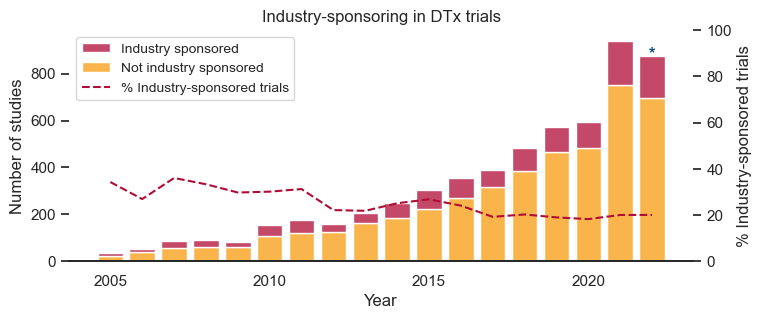

In [22]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "industry_funding", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)], y = line_graph_data_total.industry_funding_rate, color = "#B00C36", linestyle = "--",label = '% industry-sponsored trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Industry sponsored", "Not industry sponsored",  '% Industry-sponsored trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% Industry-sponsored trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Industry-sponsoring in DTx trials")
plt.text(2022, 88, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/All_Studies_Industry_Sponsoring_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/All_Studies_Industry_Sponsoring_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Country and Location Features


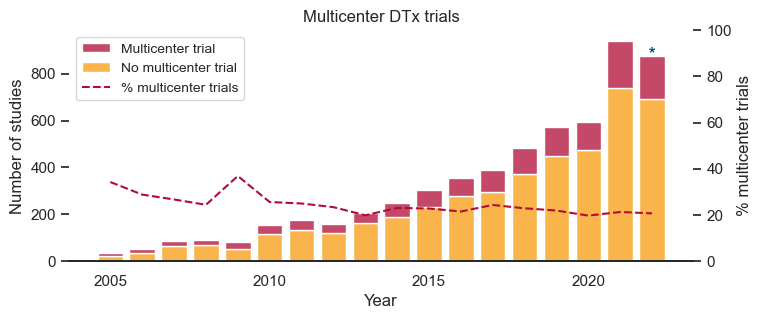

In [23]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multicenter", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)], y = line_graph_data_total.multicenter_rate, color = "#B00C36", linestyle = "--",label = '% multicenter trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Multicenter trial", "No multicenter trial",  '% multicenter trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% multicenter trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)
plt.text(2022, 88, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


sns.despine(left = True)
plt.title("Multicenter DTx trials")

plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/All_Studies_Multicenter_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/All_Studies_Multicenter_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

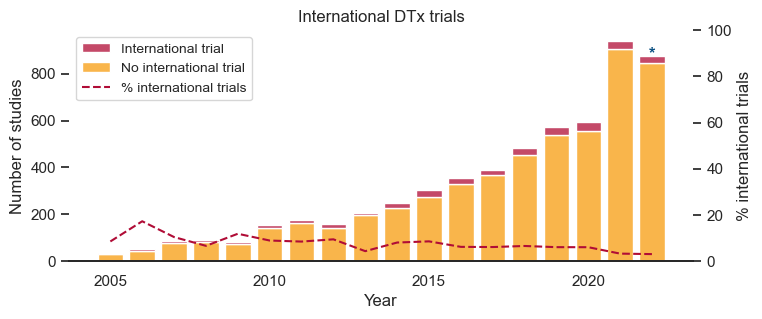

In [24]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multi_country", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_total.start_year[line_graph_data_total.start_year.between(2005,2022)], y = line_graph_data_total.multi_country_rate, color = "#B00C36", linestyle = "--",label = '% international Trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["International trial", "No international trial",  '% international trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% international trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("International DTx trials")

plt.xticks([2005,2010,2015,2020])
plt.text(2022, 88, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.savefig('Graphs/CTGOV_DTX/All_Studies_International_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/All_Studies_International_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

## Interventional Studies Graphs

In [25]:
total_interventional_occurences_per_year= dataframe[dataframe["Study Type"] == "Interventional"]["start_year"].value_counts().sort_index().reset_index(drop=True)

line_graph_data_int = dataframe[dataframe["Study Type"] == "Interventional"].groupby("start_year").agg({i:'value_counts' for i in ["masked", "randomized","industry_funding", "num_patient_more_than_100", "multicenter", "multi_country"]})
line_graph_data_int.reset_index(inplace=True)
line_graph_data_int
line_graph_data_int.drop(line_graph_data_int.loc[line_graph_data_int['level_1']=="No"].index, inplace=True)
line_graph_data_int.drop("level_1", axis = 1, inplace = True)
line_graph_data_int.reset_index(inplace=True, drop = True)
line_graph_data_int["total_interventional"] = total_interventional_occurences_per_year
line_graph_data_int["masked_rate"] = round(line_graph_data_int["masked"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["num_patient_more_than_100_rate"] = round(line_graph_data_int["num_patient_more_than_100"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["multicenter_rate"] = round(line_graph_data_int["multicenter"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["multi_country_rate"] = round(line_graph_data_int["multi_country"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["median_enrollment"] = dataframe[dataframe["Study Type"] == "Interventional"].groupby("start_year").agg({i:'median' for i in [ "Enrollment"]}).values


line_graph_data_int["randomized_rate"] = round(line_graph_data_int["randomized"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["industry_funding_rate"] = round(line_graph_data_int["industry_funding"]/line_graph_data_int["total_interventional"] *100, 2)
line_graph_data_int["start_year"] = line_graph_data_int["start_year"].astype(int)




### Study Subjects per Trial

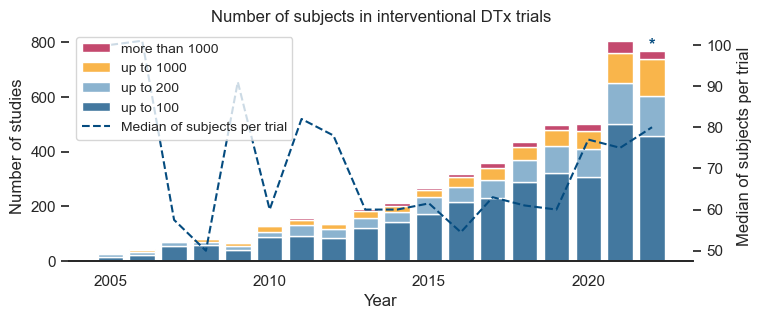

In [26]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Interventional"))] ,
                  x = "start_year", 
                  binwidth = 1, discrete = True, hue = "num_patient_category",
                  palette= ["#B00C3E", "#F89C0E","#659ABF", "#044B7F" ],
                  multiple= "stack", label = "Stackbar", shrink = 0.8)
ax.legend(["up to 100", "up to 200", "up to 1000", "more than 1000"][::-1], fontsize = "small")
handles1=  ax.get_legend().legendHandles[::-1]
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.median_enrollment, color = "#044B7F", linestyle = "--",label = 'Median of subjects per trial')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["more than 1000", "up to 1000", "up to 200", "up to 100",  'Median of subjects per trial']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("Median of subjects per trial")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
#ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Number of subjects in interventional DTx trials")
plt.text(2022, 99, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Number_Subjects_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Number_Subjects_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()




### Industry Funding

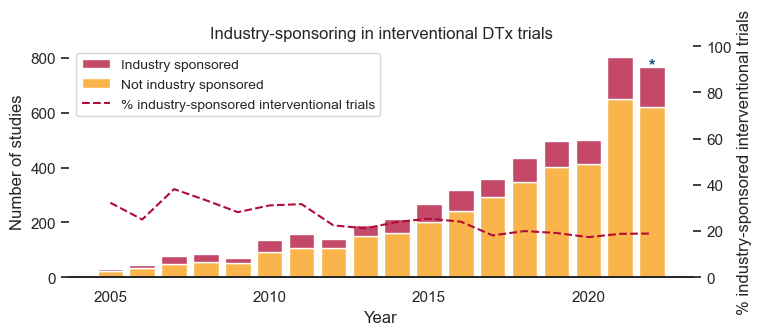

In [27]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Interventional"))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "industry_funding", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.industry_funding_rate, color = "#B00C36", linestyle = "--",label = '% industry-sponsored interventional trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Industry sponsored", "Not industry sponsored",  '% industry-sponsored interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% industry-sponsored interventional trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Industry-sponsoring in interventional DTx trials")
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Industry_Sponsoring_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Industry_Sponsoring_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Randomization Graph

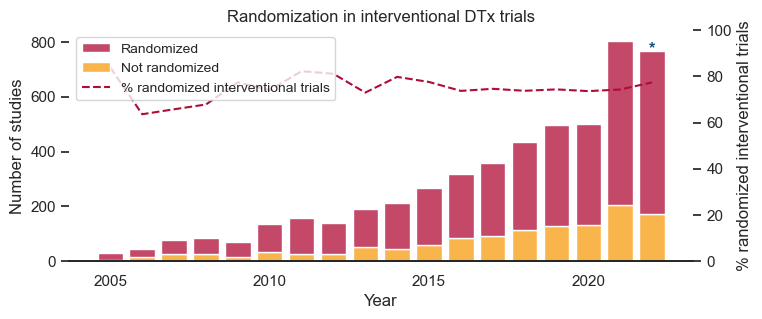

In [28]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Interventional"))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "randomized", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.randomized_rate, color = "#B00C36", linestyle = "--",label = '% randomized interventional trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Randomized", "Not randomized",  '% randomized interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% randomized interventional trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Randomization in interventional DTx trials")
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Randomization_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Randomization_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Masking Graph

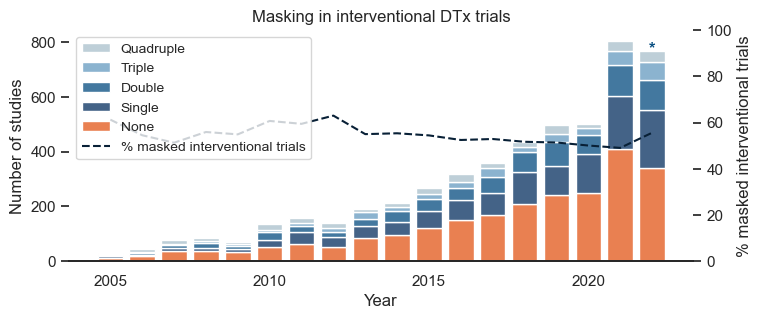

In [29]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Interventional"))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "masking_number", 
                  palette= [    "#A8C0CB","#659ABF","#044B7F","#052F5F","#E25617", ],
                  multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.masked_rate, color = "#082036", linestyle = "--",label = '% Masked interventional trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= [ "Quadruple","Triple", "Double","Single", "None",  '% masked interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% masked interventional trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Masking in interventional DTx trials")
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Masking_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Masking_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

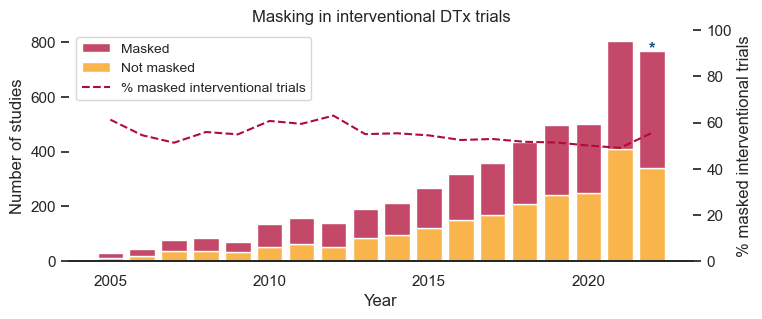

In [30]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Interventional"))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "masked", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.masked_rate, color = "#B00C36", linestyle = "--",label = '% masked interventional trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Masked", "Not masked",  '% masked interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% masked interventional trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Masking in interventional DTx trials")

plt.xticks([2005,2010,2015,2020])
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Masking_at_all.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Masking_at_all.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Country and Location Features

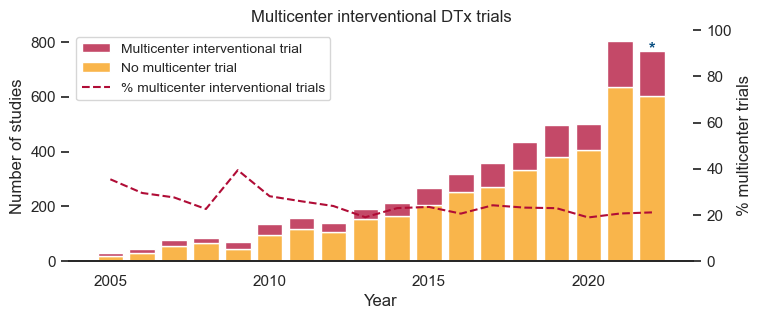

In [31]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022) & (dataframe["Study Type"] == "Interventional")))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multicenter", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.multicenter_rate, color = "#B00C36", linestyle = "--",label = '% Multicenter Trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Multicenter interventional trial", "No multicenter trial",  '% multicenter interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% multicenter trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Multicenter interventional DTx trials")
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Multicenter_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_Multicenter_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

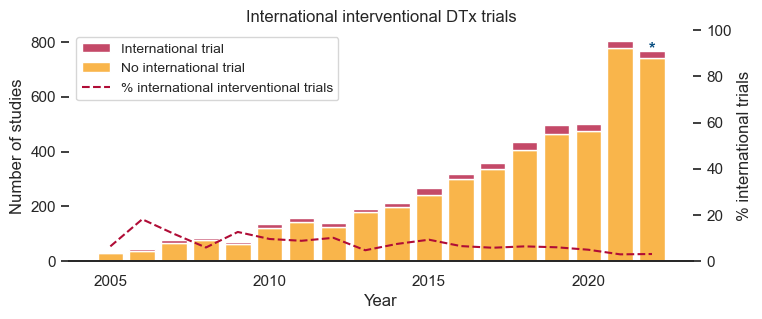

In [32]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022) & (dataframe["Study Type"] == "Interventional")))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multi_country", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_int.start_year[line_graph_data_int.start_year.between(2005,2022)], y = line_graph_data_int.multi_country_rate, color = "#B00C36", linestyle = "--",label = '% international trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["International trial", "No international trial",  '% international interventional trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% international trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("International interventional DTx trials")
plt.text(2022, 90, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_International_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Interventional_Studies_International_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

## Observational Studies Graph

In [33]:
total_Observational_occurences_per_year= dataframe[dataframe["Study Type"] == "Observational"]["start_year"].value_counts().sort_index().reset_index(drop=True)

line_graph_data_obs = dataframe[dataframe["Study Type"] == "Observational"].groupby("start_year").agg({i:'value_counts' for i in ["masked", "randomized","industry_funding", "num_patient_more_than_100", "multicenter", "multi_country"]})
line_graph_data_obs.reset_index(inplace=True)
line_graph_data_obs.drop(line_graph_data_obs.loc[line_graph_data_obs['level_1']=="No"].index, inplace=True)
line_graph_data_obs.drop("level_1", axis = 1, inplace = True)
line_graph_data_obs.reset_index(inplace=True, drop = True)
line_graph_data_obs["total_Observational"] = total_Observational_occurences_per_year
line_graph_data_obs["masked_rate"] = round(line_graph_data_obs["masked"]/line_graph_data_obs["total_Observational"] *100, 2)
line_graph_data_obs["num_patient_more_than_100_rate"] = round(line_graph_data_obs["num_patient_more_than_100"]/line_graph_data_obs["total_Observational"] *100, 2)
line_graph_data_obs["multicenter_rate"] = round(line_graph_data_obs["multicenter"]/line_graph_data_obs["total_Observational"] *100, 2)
line_graph_data_obs["multi_country_rate"] = round(line_graph_data_obs["multi_country"]/line_graph_data_obs["total_Observational"] *100, 2)
line_graph_data_obs["median_enrollment"] = dataframe[dataframe["Study Type"] == "Observational"].groupby("start_year").agg({i:'median' for i in [ "Enrollment"]}).values


line_graph_data_obs["randomized_rate"] = round(line_graph_data_obs["randomized"]/line_graph_data_obs["total_Observational"] *100, 2)
line_graph_data_obs["industry_funding_rate"] = round(line_graph_data_obs["industry_funding"]/line_graph_data_obs["total_Observational"] *100, 2)


### Subjects per Study Graph

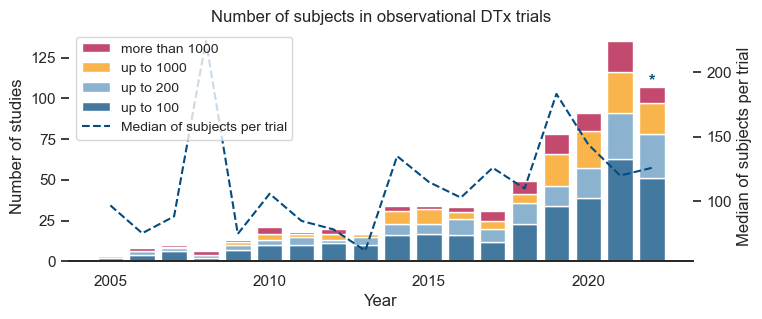

In [34]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Observational"))] ,
                  x = "start_year", 
                  binwidth = 1, discrete = True, hue = "num_patient_category",
                  palette= ["#B00C3E", "#F89C0E","#659ABF", "#044B7F" ],
                  multiple= "stack", label = "Stackbar", shrink = 0.8)
ax.legend(["up to 100", "up to 200", "up to 1000", "more than 1000"][::-1], fontsize = "small")
handles1=  ax.get_legend().legendHandles[::-1]
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")




ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_obs.start_year[line_graph_data_obs.start_year.between(2005,2022)], y = line_graph_data_obs.median_enrollment, color = "#044B7F", linestyle = "--",label = 'Median of subjects per trial')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["more than 1000", "up to 1000", "up to 200", "up to 100",  'Median of subjects per trial']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("Median of subjects per trial")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
#ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Number of subjects in observational DTx trials")
plt.text(2022, 190, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Number_Subjects_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Number_Subjects_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()




### Industry Sponsoring

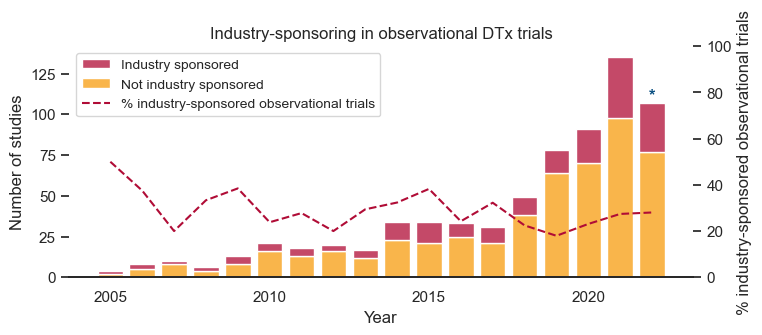

In [35]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022)) & (dataframe["Study Type"] == "Observational"))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "industry_funding", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_obs.start_year[line_graph_data_obs.start_year.between(2005,2022)], y = line_graph_data_obs.industry_funding_rate, color = "#B00C36", linestyle = "--",label = '% industry-sponsered observational trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Industry sponsored", "Not industry sponsored",  '% industry-sponsored observational trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% industry-sponsored observational trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Industry-sponsoring in observational DTx trials")
plt.text(2022, 77, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Industry_Sponsoring_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Industry_Sponsoring_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Country and Location Features

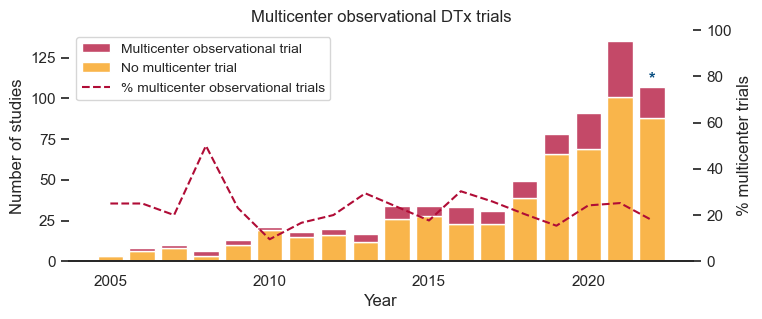

In [36]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022) & (dataframe["Study Type"] == "Observational")))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multicenter", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_obs.start_year[line_graph_data_obs.start_year.between(2005,2022)], y = line_graph_data_obs.multicenter_rate, color = "#B00C36", linestyle = "--",label = '% multicenter trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Multicenter observational trial", "No multicenter trial",  '% multicenter observational trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% multicenter trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("Multicenter observational DTx trials")
plt.text(2022, 77, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Multicenter_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_Multicenter_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

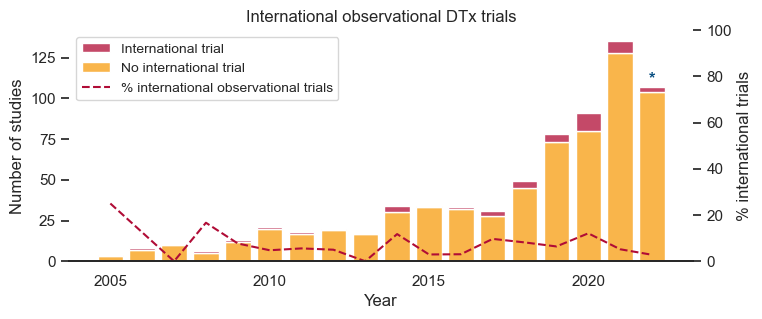

In [37]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.histplot(data = dataframe[((dataframe["start_year"].between(2005,2022) & (dataframe["Study Type"] == "Observational")))] ,
                  x = "start_year",   binwidth = 1, discrete = True,
                  hue = "multi_country", 
                  palette= [ "#B00C36","#F89C0E"], multiple= "stack", shrink = 0.8, label = "Theplot")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("Number of studies")
plt.xlabel("Year")



ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x = line_graph_data_obs.start_year[line_graph_data_obs.start_year.between(2005,2022)], y = line_graph_data_obs.multi_country_rate, color = "#B00C36", linestyle = "--",label = '% international trials')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["International trial", "No international trial",  '% international observational trials']
ax2.legend(handles, labels,fontsize = "small", frameon = True, loc = "upper left")
plt.ylabel("% international trials")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
ax2.set_ylim(0,100)

sns.despine(left = True)
plt.title("International observational DTx trials")
plt.text(2022, 77, "*", horizontalalignment='center', size='medium', color='#044B7F', weight='semibold')


plt.xticks([2005,2010,2015,2020])

plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_International_with_share.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Observational_Studies_International_with_share.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Some plain numbers for writing

In [38]:
dataframe[dataframe["Study Type"] == "Observational"]["Enrollment"].describe()

count    7.090000e+02
mean     5.559638e+03
std      6.485844e+04
min      0.000000e+00
25%      5.000000e+01
50%      1.200000e+02
75%      4.000000e+02
max      1.341172e+06
Name: Enrollment, dtype: float64

In [39]:
dataframe[dataframe["Study Type"] == "Interventional"]["Enrollment"].describe()

count    5.085000e+03
mean     1.358500e+03
std      3.219671e+04
min      0.000000e+00
25%      3.400000e+01
50%      6.800000e+01
75%      1.650000e+02
max      2.000000e+06
Name: Enrollment, dtype: float64

In [40]:
dataframe.groupby("start_year").agg({i:'median' for i in [ "Enrollment"]})


Enrollment
start_year            
2005.0           100.0
2006.0           101.0
2007.0            60.0
2008.0            51.5
2009.0            85.5
2010.0            66.0
2011.0            83.0
2012.0            78.0
2013.0            60.5
2014.0            60.0
2015.0            64.5
2016.0            56.0
2017.0            68.5
2018.0            65.0
2019.0            64.5
2020.0            84.0
2021.0            79.5
2022.0            90.0

In [41]:
len(dataframe[(dataframe["Study Type"] == "Interventional") & (dataframe["masked"] == "Yes")])/len(dataframe[dataframe["Study Type"] == "Interventional"])

0.5323373304501671

In [42]:
len(dataframe[(dataframe["Study Type"] == "Interventional") & (dataframe["randomized"] == "Yes")])/len(dataframe[dataframe["Study Type"] == "Interventional"])

0.7523098093178691

# Analyze Composition of Indication/Disorders

In [43]:
dataframe["conditions_list"] = dataframe["Conditions"].str.split("|")
condition_occurrences = pd.Series([x for item in dataframe.conditions_list for x in item]).value_counts()
#condition_occurrences.to_excel("Data/DTX_Trials_by_Condition_05122022.xlsx")



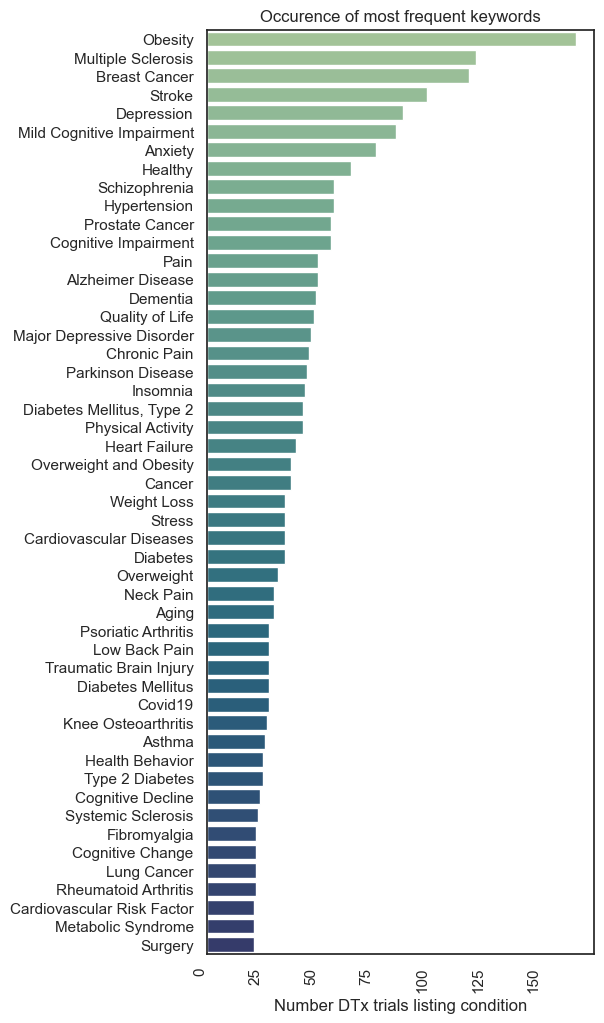

In [44]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= condition_occurrences[:50], 
                  y = condition_occurrences.index[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurence of most frequent keywords")

plt.xlabel("Number DTx trials listing condition")
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


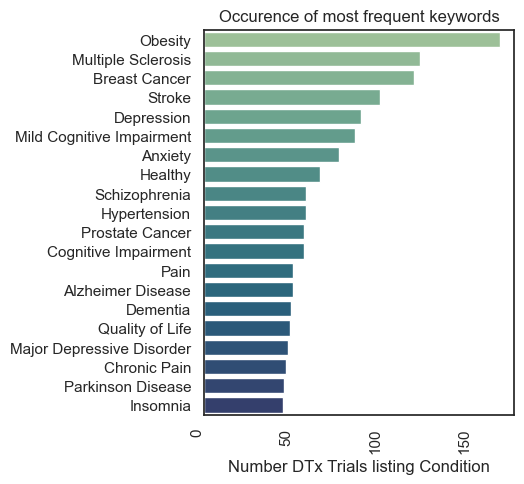

In [45]:
fig = plt.figure(figsize=(4,5))
sns.set_theme(style="white")

ax = sns.barplot( x= condition_occurrences[:20], 
                  y = condition_occurrences.index[:20],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurence of most frequent keywords")

plt.xlabel("Number DTx Trials listing Condition")
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_small.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


## Analysis of Manually Mapped Data

#### Standard Overview Analysis

In [46]:
# #Update mapped data in case of new data pull
# mapped_data = pd.read_excel("Data/DTX_Trials_by_Condition_2023_mapped.xlsx") #read in old data
# new_data = pd.DataFrame(data = {"Count":condition_occurrences, "Original_Ind" : condition_occurrences.index }).reset_index(drop = True) #create new data
# merged_data = pd.merge(new_data, mapped_data, how = "outer", left_on = "Original_Ind", right_on = "Original_Ind") #merge new and old data
# merged_data.drop(columns = ["Count_y"], inplace = True) #drop old count column
# merged_data.rename(columns = {"Count_x" : "Count"}, inplace = True) #rename new count column
# temp_cols = merged_data.columns.tolist() #reorder columns
# first_col = temp_cols.pop(0) 
# temp_cols.insert(1, first_col)
# merged_data= merged_data[temp_cols]
# merged_data.to_excel("Data/DTX_Trials_by_Condition_2023_mapped.xlsx", index = False) #save merged data

In [47]:
mapped_data = pd.read_excel("Data/DTX_Trials_by_Condition_2023_mapped.xlsx").dropna(how = "any", subset = ["ICD_11_lvl_1"])
mapped_data = mapped_data[mapped_data["Count"] > 1]
mapped_data.ICD_11_lvl_1 = mapped_data.ICD_11_lvl_1.str.replace("\\n", "\n", regex = False)
mapped_data.ICD_11_lvl_2 = mapped_data.ICD_11_lvl_2.str.replace("\\n", "\n", regex = False)

In [48]:
ATC_series = mapped_data[["Count", "ATC_lvl_1"]].groupby(["ATC_lvl_1"]).sum().sort_values(by = "Count", ascending = False)

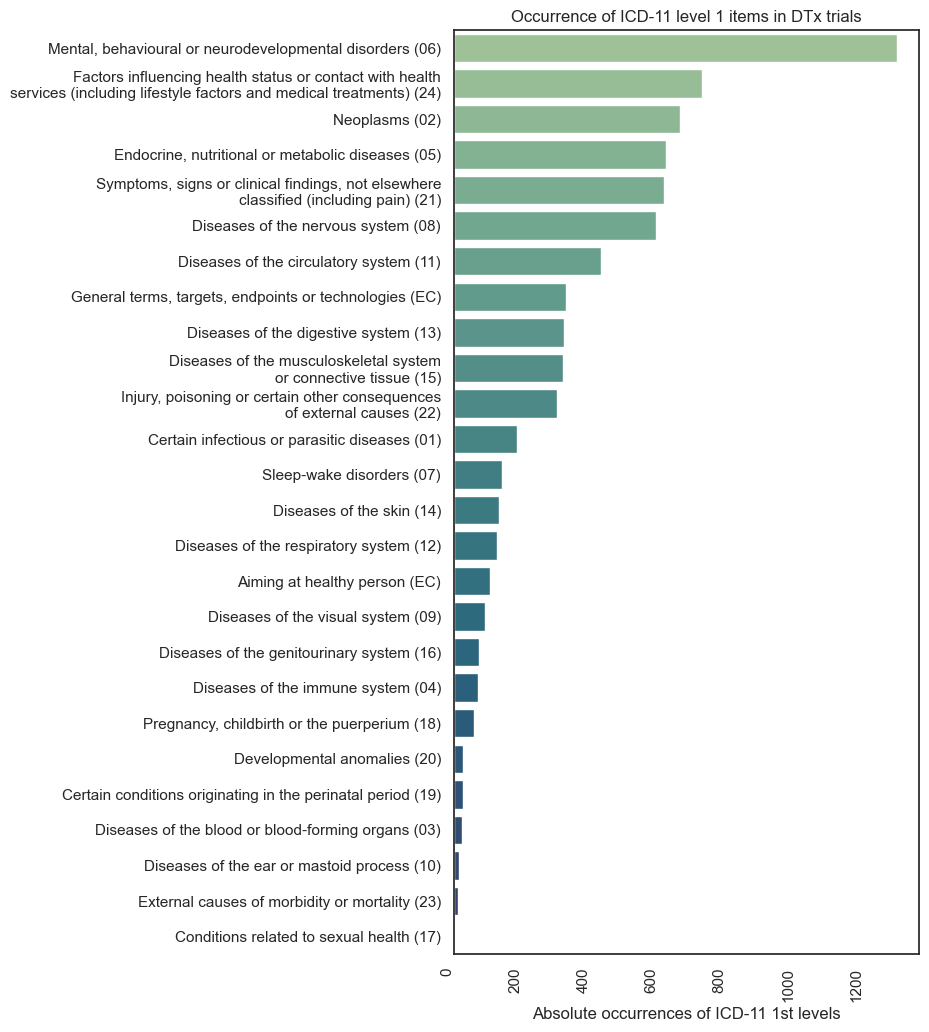

In [49]:
ICD_11_series_lvl_1 = mapped_data[["Count", "ICD_11_lvl_1"]].groupby(["ICD_11_lvl_1"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(6,12))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_1.Count, 
                  y = ICD_11_series_lvl_1.index,
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurrence of ICD-11 level 1 items in DTx trials")
plt.xlabel("Absolute occurrences of ICD-11 1st levels")
plt.ylabel("ICD-11 level 1")
ax.set(ylabel=None)


plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_1.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_1.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


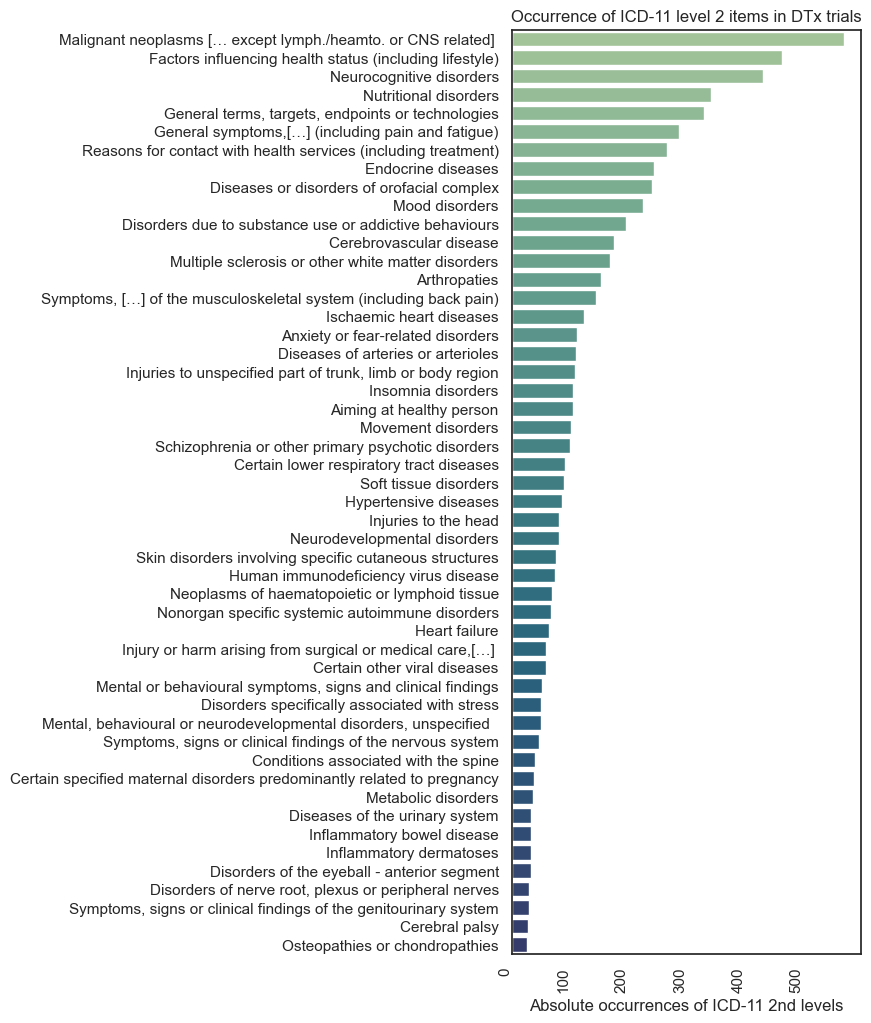

In [50]:
ICD_11_series_lvl_2 = mapped_data[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(4.5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_2.Count[:50], 
                  y = ICD_11_series_lvl_2.index[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurrence of ICD-11 level 2 items in DTx trials")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")
ax.set(ylabel=None)


plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


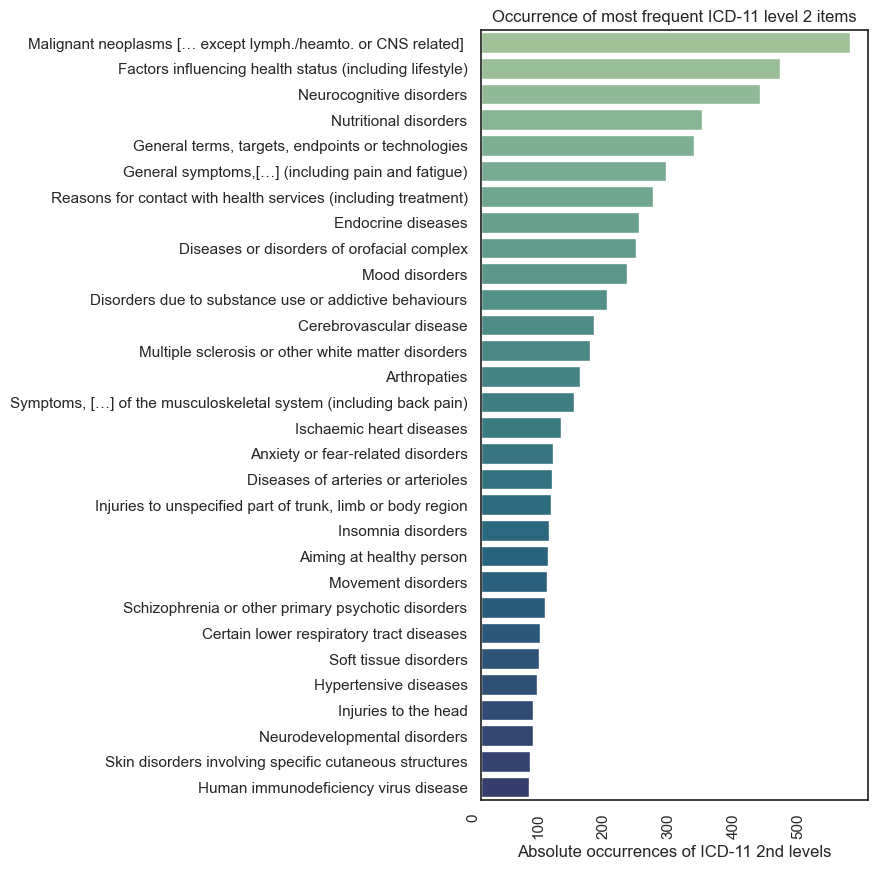

In [51]:
ICD_11_series_lvl_2 = mapped_data[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,10))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_2.Count[:30], 
                  y = ICD_11_series_lvl_2.index[:30],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurrence of most frequent ICD-11 level 2 items")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")
ax.set(ylabel=None)


plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_2_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_ICD11_lvl_2_small.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


#### Analysis of weighted data (Correct for indications per trial)

In [52]:
dataframe["conditions_list"] = dataframe["Conditions"].str.split("|")
dataframe["number_of_inds_per_trial"] = dataframe["conditions_list"].apply(len)
dataframe["number_of_inds_weight"] = 1/dataframe["number_of_inds_per_trial"]
condition_occurrences_weighted = pd.Series(dtype="float64")
for index, row in dataframe.iterrows():
    for condition in row["conditions_list"]:
        if condition in condition_occurrences_weighted:
            condition_occurrences_weighted.loc[condition] += row["number_of_inds_weight"]
        else:
            condition_occurrences_weighted[condition] = row["number_of_inds_weight"]
            
condition_occurrences_weighted.sort_values(ascending=False, inplace = True)
condition_occurrences_weighted=condition_occurrences_weighted.round(2)
condition_occurrences.to_excel("Data/DTX_Trials_by_Condition_weighted_2023.xlsx")



In [53]:
dataframe["conditions_list"] = dataframe["Conditions"].str.split("|")
dataframe["number_of_inds_per_trial"] = dataframe["conditions_list"].apply(len)
dataframe["number_of_inds_weight"] = 1/dataframe["number_of_inds_per_trial"]
condition_occurrences_weighted = pd.Series(dtype="float64")
for index, row in dataframe.iterrows():
    for condition in row["conditions_list"]:
        if condition in condition_occurrences_weighted:
            condition_occurrences_weighted.loc[condition] += row["number_of_inds_weight"]
        else:
            condition_occurrences_weighted[condition] = row["number_of_inds_weight"]
            
condition_occurrences_weighted.sort_values(ascending=False, inplace = True)
condition_occurrences_weighted=condition_occurrences_weighted.round(2)
condition_occurrences.to_excel("Data/DTX_Trials_by_Condition_weighted_2023.xlsx")

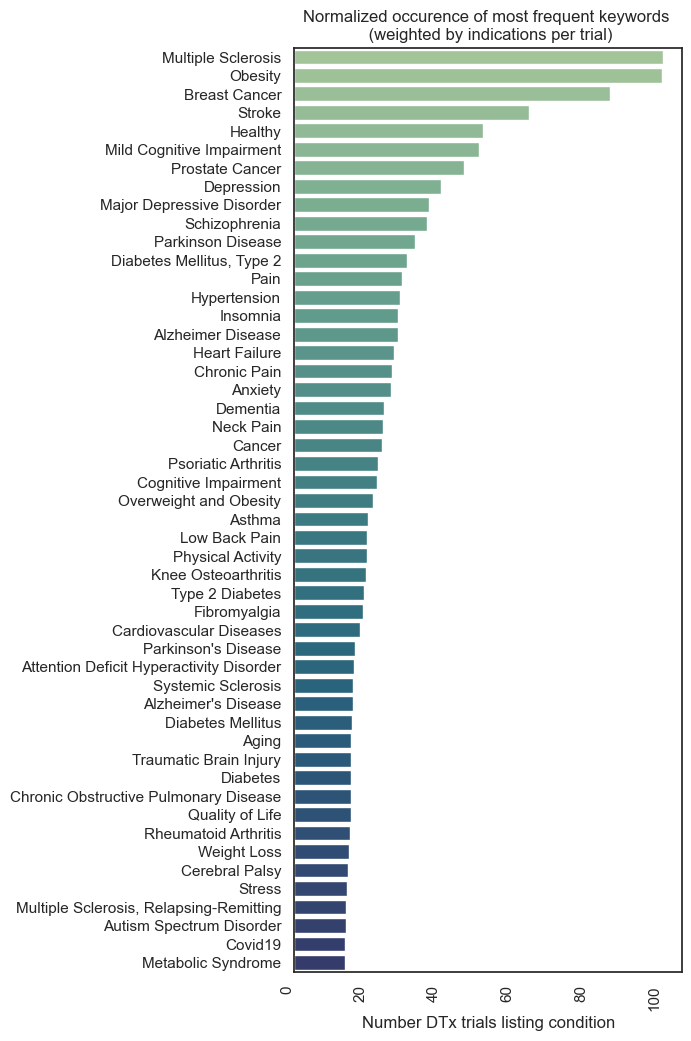

In [54]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= condition_occurrences_weighted[:50], 
                  y = condition_occurrences_weighted.index[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Normalized occurence of most frequent keywords \n (weighted by indications per trial)")

plt.xlabel("Number DTx trials listing condition")
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


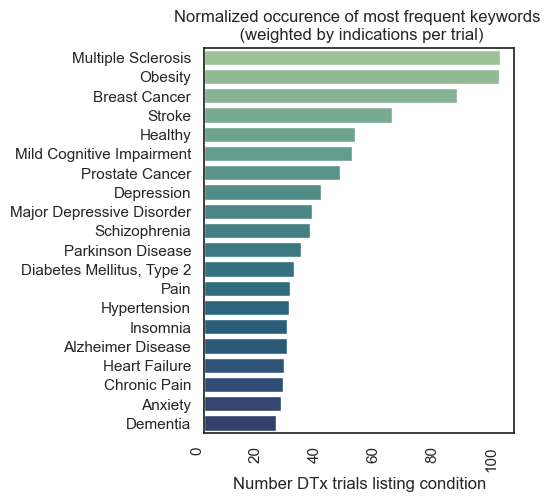

In [55]:
fig = plt.figure(figsize=(4,5))
sns.set_theme(style="white")

ax = sns.barplot( x= condition_occurrences_weighted[:20], 
                  y = condition_occurrences_weighted.index[:20],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Normalized occurence of most frequent keywords \n (weighted by indications per trial)")

plt.xlabel("Number DTx trials listing condition")
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_small.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


In [56]:
mapped_data.set_index("Original_Ind", drop = True, inplace = True)
icd_df = mapped_data[["ICD_11_lvl_2","ICD_11_lvl_2"]]

In [57]:
icd_df = mapped_data[["ICD_11_lvl_1","ICD_11_lvl_2"]]

In [58]:
condition_occurrences_weighted_df = pd.DataFrame(data = 
                                              {"Normalized_Count": condition_occurrences_weighted})
condition_occurrences_weighted_df = pd.concat([condition_occurrences_weighted_df,icd_df], axis = 1).dropna(how = "any", subset=["ICD_11_lvl_1"])
condition_occurrences_weighted_df.ICD_11_lvl_1 = condition_occurrences_weighted_df.ICD_11_lvl_1.str.replace("\\n", "\n", regex = False)
condition_occurrences_weighted_df.ICD_11_lvl_2 = condition_occurrences_weighted_df.ICD_11_lvl_2.str.replace("\\n", "\n", regex = False)

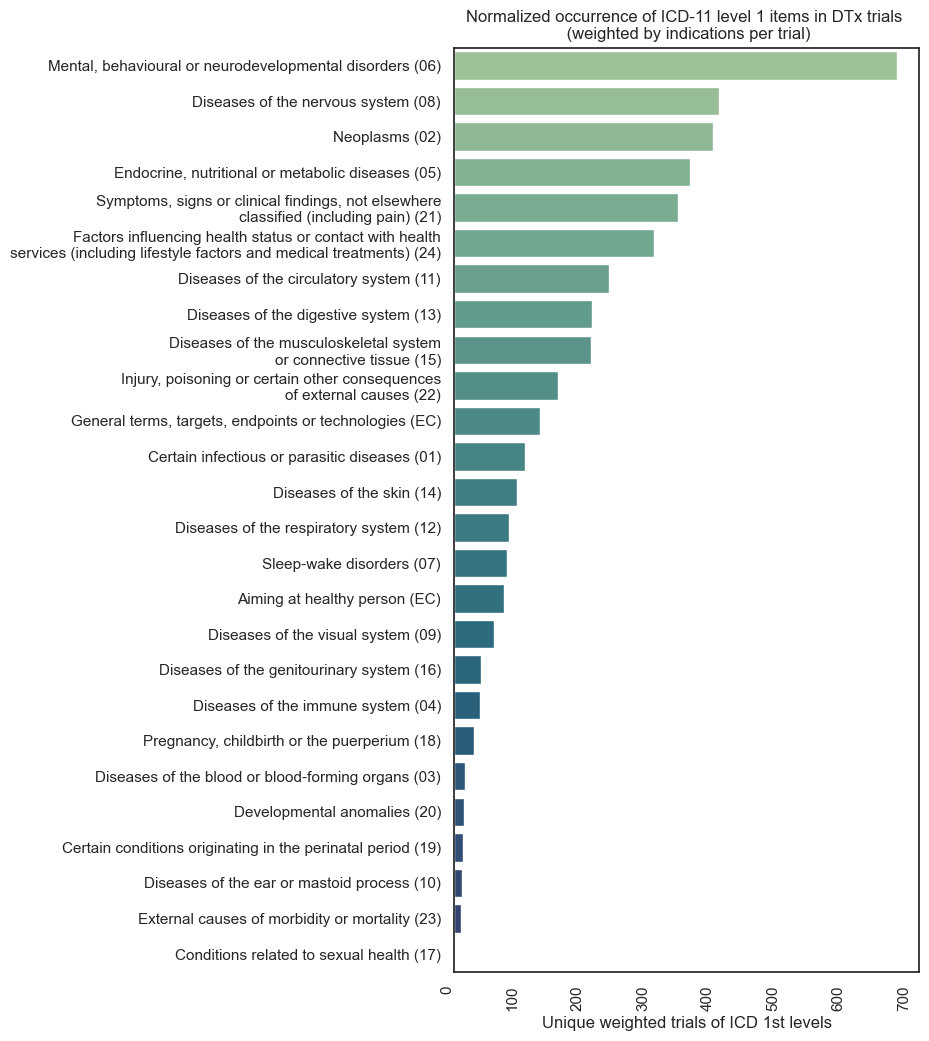

In [59]:
ICD_11_series_lvl_1_w = condition_occurrences_weighted_df[["Normalized_Count", "ICD_11_lvl_1"]].groupby(["ICD_11_lvl_1"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(6,12))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_1_w.Normalized_Count, 
                  y = ICD_11_series_lvl_1_w.index.values.tolist(),
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Normalized occurrence of ICD-11 level 1 items in DTx trials \n (weighted by indications per trial)")
plt.xlabel("Unique weighted trials of ICD 1st levels")
plt.ylabel("ICD-11 level 1")
ax.set(ylabel=None)



plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_1.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_1.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


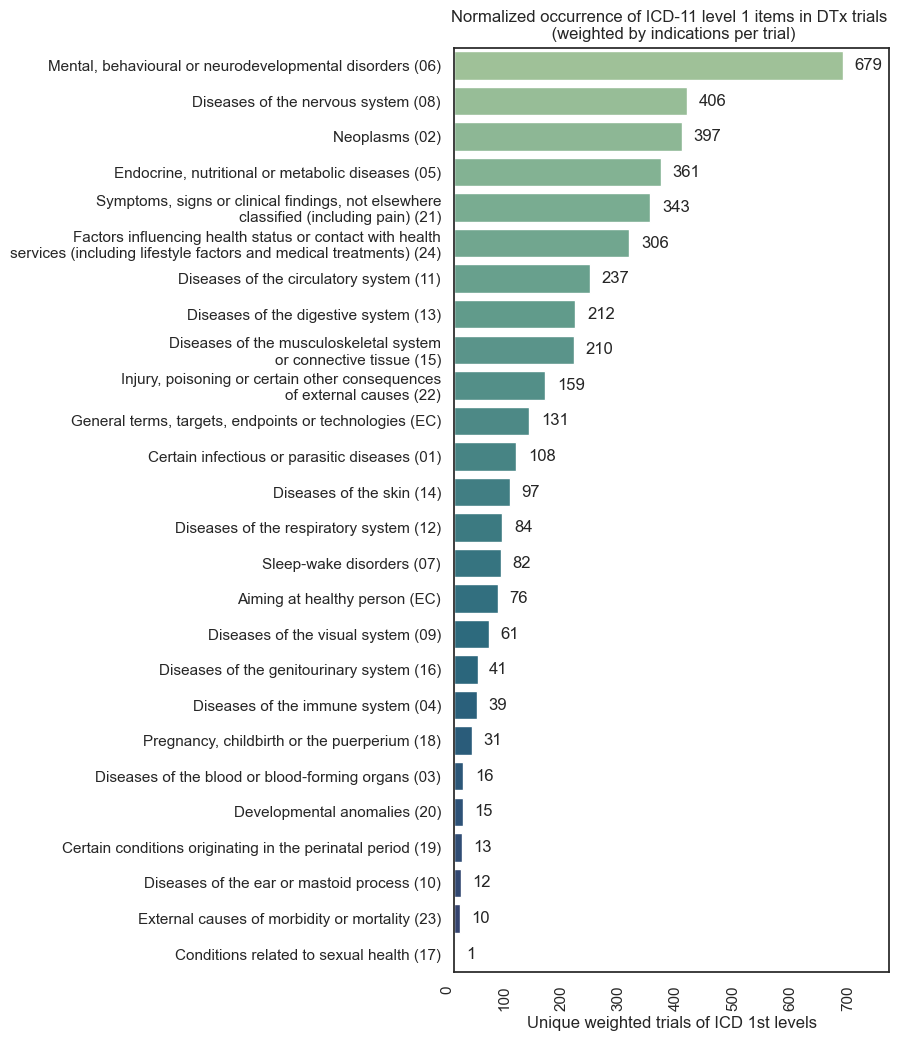

In [60]:

fig = plt.figure(figsize=(6,12))
sns.set_theme(style="white")

ax = sns.barplot(x=ICD_11_series_lvl_1_w.Normalized_Count, 
                 y=ICD_11_series_lvl_1_w.index.values.tolist(),
                 palette="crest",
                 orient="h")

plt.xticks(rotation=90, ha='right')
plt.title("Normalized occurrence of ICD-11 level 1 items in DTx trials \n (weighted by indications per trial)")
plt.xlabel("Unique weighted trials of ICD 1st levels")
plt.ylabel("ICD-11 level 1")
ax.set(ylabel=None)

# Loop through each bar in the barplot and annotate with rounded numbers
for p in ax.patches:
    width = p.get_width()  # get the width of each bar
    ax.text(width + 0.03 * max(ICD_11_series_lvl_1_w.Normalized_Count),  # x position with scaled offset
            p.get_y() + p.get_height() / 2,  # y position, at the center of each bar
            '{:d}'.format(round(width)),  # the text to show as a rounded integer
            va='center')  # vertical alignment

# Adjust the limits of the x-axis to add more space for the annotation
plt.xlim(0, max(ICD_11_series_lvl_1_w.Normalized_Count) * 1.12)

# Saving the figures with a larger right margin
plt.subplots_adjust(right=0.85)
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_1.svg', dpi=600, bbox_inches='tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_1.tiff', dpi=600, bbox_inches='tight')

plt.show()

In [61]:
# Explode the conditions_list column
exploded_df = dataframe.explode('conditions_list')

# Recalculate 'is_industry_funded' and 'weighted_industry_funding' after exploding
exploded_df['is_industry_funded'] = exploded_df['industry_funding'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
exploded_df['weighted_industry_funding'] = exploded_df['is_industry_funded'] * exploded_df['number_of_inds_weight']

# Group by condition and aggregate 'weighted_industry_funding' and 'number_of_inds_weight'
grouped = exploded_df.groupby('conditions_list').agg({
    'weighted_industry_funding': 'sum',
    'number_of_inds_weight': 'sum'
}).reset_index()

# Merge condition_occurrences_weighted_df with grouped dataframe on conditions
merged_df = pd.merge(condition_occurrences_weighted_df, grouped, left_on=condition_occurrences_weighted_df.index, right_on='conditions_list')

# Calculate total weight of each 'ICD_11_lvl_1' category
icd_weights = merged_df.groupby('ICD_11_lvl_1')['number_of_inds_weight'].sum()

# Calculate weighted sum of industry funding for each 'ICD_11_lvl_1'
icd_funding_weighted = merged_df.groupby('ICD_11_lvl_1')['weighted_industry_funding'].sum()

# Normalize the weighted industry funding by the total weight of each 'ICD_11_lvl_1' category
icd_funding_normalized = icd_funding_weighted / icd_weights


print(icd_funding_normalized)


ICD_11_lvl_1
Aiming at healthy person (EC)                                                                                                   0.356902
Certain conditions originating in the perinatal period (19)                                                                     0.096962
Certain infectious or parasitic diseases (01)                                                                                   0.254438
Conditions related to sexual health (17)                                                                                        0.000000
Developmental anomalies (20)                                                                                                    0.093797
Diseases of the blood or blood-forming organs (03)                                                                              0.276730
Diseases of the circulatory system (11)                                                                                         0.271202
Diseases of the digestive sy

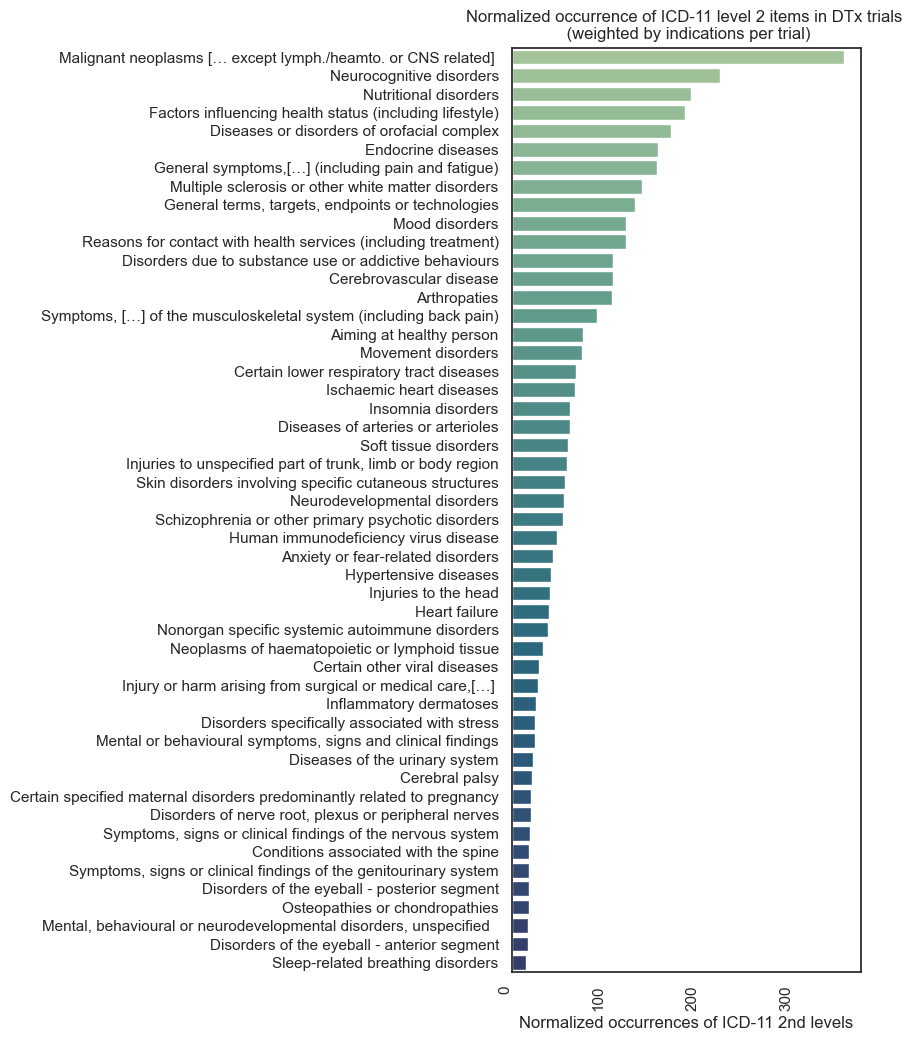

In [62]:
ICD_11_series_lvl_2_w = condition_occurrences_weighted_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(4.5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_2_w.Normalized_Count[:50], 
                  y = ICD_11_series_lvl_2_w.index[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Normalized occurrence of ICD-11 level 2 items in DTx trials \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")
ax.set(ylabel=None)



plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


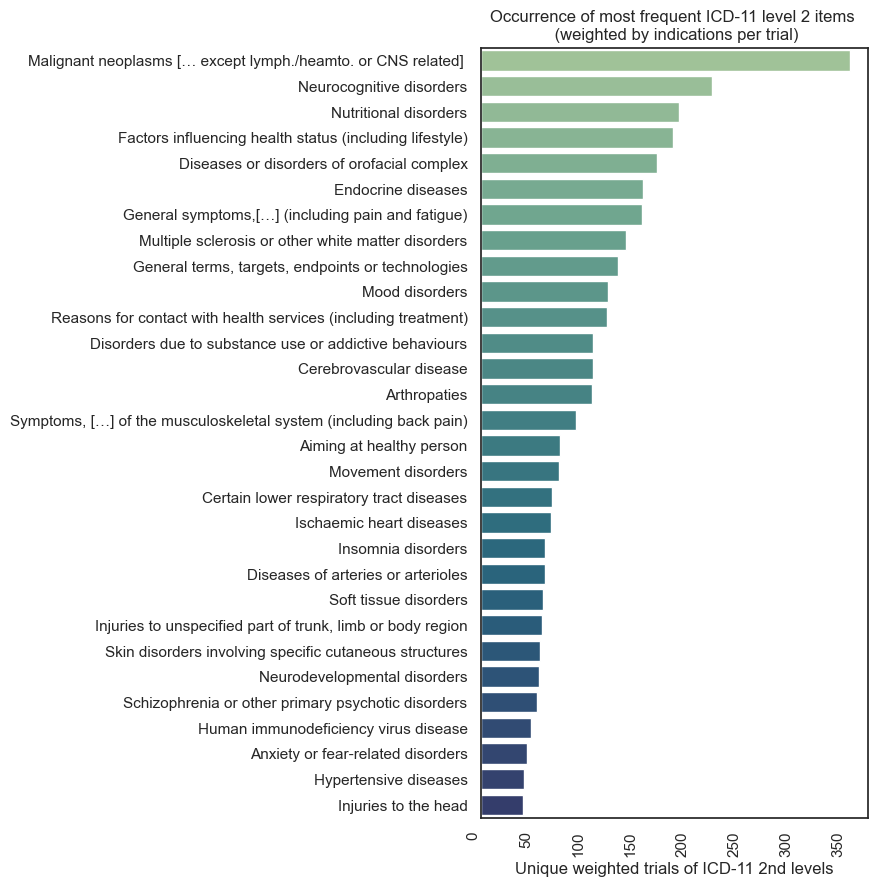

In [63]:


ICD_11_series_lvl_2_w = condition_occurrences_weighted_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,10))
sns.set_theme(style="white")

ax = sns.barplot( x= ICD_11_series_lvl_2_w.Normalized_Count[:30], 
                  y = ICD_11_series_lvl_2_w.index[:30],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Occurrence of most frequent ICD-11 level 2 items \n (weighted by indications per trial)")
plt.xlabel("Unique weighted trials of ICD-11 2nd levels")
#plt.ylabel("ICD-11 Level 2")
ax.set(ylabel=None)



plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_2_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_most_frequent_conditions_weighted_ICD11_lvl_2_small.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

## Industry-weighted percentage

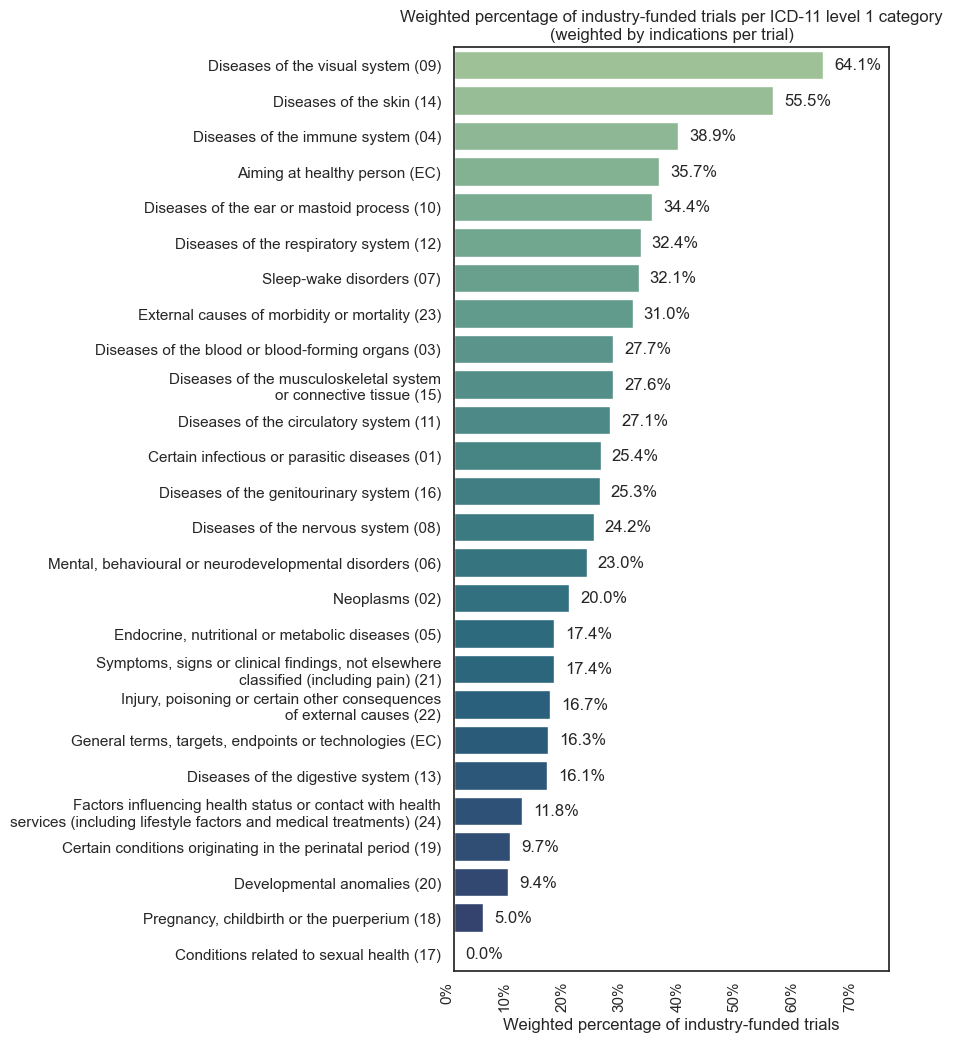

In [64]:

from matplotlib.ticker import FuncFormatter
# Assuming your dataframe is named 'dataframe'
# And your 'condition_occurrences_weighted_df' dataframe has been previously defined

# Explode the conditions_list column
exploded_df = dataframe.explode('conditions_list')

# Recalculate 'is_industry_funded' and 'weighted_industry_funding' after exploding
exploded_df['is_industry_funded'] = exploded_df['industry_funding'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
exploded_df['weighted_industry_funding'] = exploded_df['is_industry_funded'] * exploded_df['number_of_inds_weight']

# Group by condition and aggregate 'weighted_industry_funding' and 'number_of_inds_weight'
grouped = exploded_df.groupby('conditions_list').agg({
    'weighted_industry_funding': 'sum',
    'number_of_inds_weight': 'sum'
}).reset_index()

# Merge condition_occurrences_weighted_df with grouped dataframe on conditions
merged_df = pd.merge(condition_occurrences_weighted_df, grouped, left_on=condition_occurrences_weighted_df.index, right_on='conditions_list')

# Calculate total weight of each 'ICD_11_lvl_1' category
icd_weights = merged_df.groupby('ICD_11_lvl_1')['number_of_inds_weight'].sum()

# Calculate weighted sum of industry funding for each 'ICD_11_lvl_1'
icd_funding_weighted = merged_df.groupby('ICD_11_lvl_1')['weighted_industry_funding'].sum()

# Normalize the weighted industry funding by the total weight of each 'ICD_11_lvl_1' category
icd_funding_normalized = icd_funding_weighted / icd_weights * 100

# Convert icd_funding_normalized Series to DataFrame and reset index
icd_funding_normalized_df = icd_funding_normalized.reset_index()

# Rename the columns for better visualization
icd_funding_normalized_df.columns = ['ICD_11_lvl_1', 'Weighted_Industry_Funding']

# Sort the DataFrame by 'Weighted_Industry_Funding' in descending order
icd_funding_normalized_df.sort_values(by='Weighted_Industry_Funding', ascending=False, inplace=True)

# Plotting
def percentage(x, pos):
    """Formatter function to add '%' sign to the x-axis ticks."""
    return '%1.1f%%' % x  # Here we change the format to include one decimal place

formatter = FuncFormatter(percentage)

fig = plt.figure(figsize=(6,12))
sns.set_theme(style="white")

ax = sns.barplot(x=icd_funding_normalized_df['Weighted_Industry_Funding'], 
                 y=icd_funding_normalized_df['ICD_11_lvl_1'],
                 palette="crest",
                 orient="h")

# Define a custom formatter function for the x-axis labels
def custom_formatter(x, pos):
    """Custom formatter to remove the decimal place from x-axis labels"""
    return f'{int(x)}%'

# Apply the custom formatter to the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
plt.xticks(rotation=90, ha='right')
plt.title("Weighted percentage of industry-funded trials per ICD-11 level 1 category\n(weighted by indications per trial)")
plt.xlabel("Weighted percentage of industry-funded trials")
ax.set(ylabel=None)
ax.xaxis.set_tick_params(pad=1)  # Reduce the pad to bring labels closer

# Annotate each bar with the value rounded to one decimal place, with a percentage sign
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.03 * max(icd_funding_normalized_df['Weighted_Industry_Funding']), 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}%'.format(width),  # Rounded to one decimal place with a percentage sign
            va='center')

# Adjust the limits of the x-axis to add more space for the annotation
plt.xlim(0, max(icd_funding_normalized_df['Weighted_Industry_Funding']) * 1.18)

# Saving the figures with a larger right margin
plt.subplots_adjust(right=0.85)
plt.savefig('Graphs/CTGOV_DTX/Overview_weighted_industry_funding_ICD11_lvl_1.svg', dpi=600, bbox_inches='tight')
plt.savefig('Graphs/CTGOV_DTX/Overview_weighted_industry_funding_ICD11_lvl_1.tiff', dpi=600, bbox_inches='tight')

plt.show()


## Analysis of Subcategories (Mental disorders, nervous system, endocrine disorders neoplasms and symptoms)

### Mental

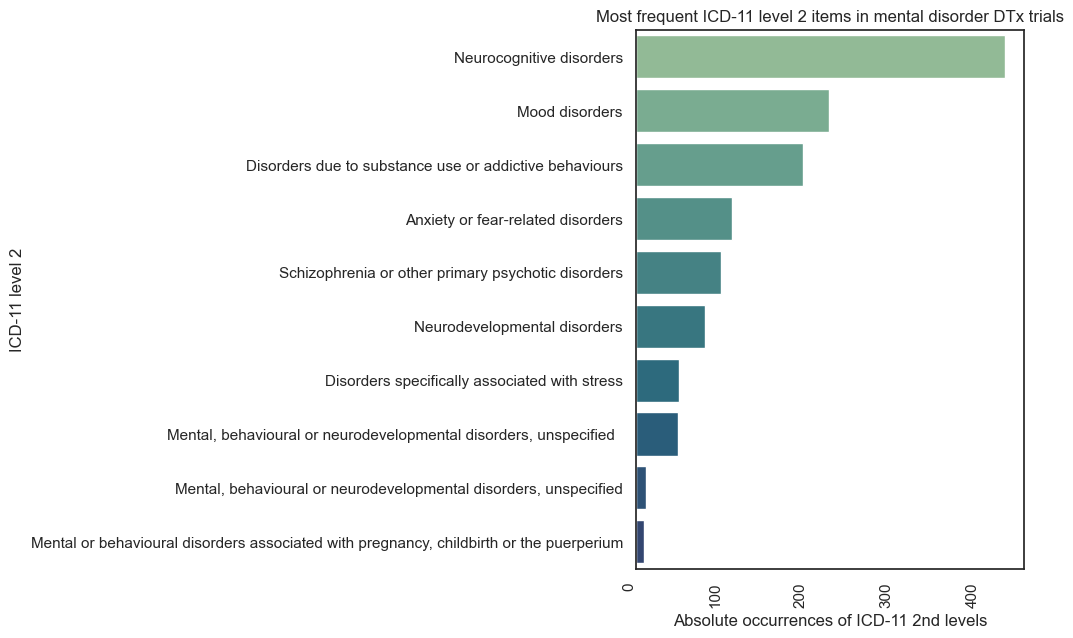

In [65]:
mental_df = mapped_data[mapped_data["ICD_11_lvl_1"] == "Mental, behavioural or neurodevelopmental disorders (06)"]


mental_ICD_11_series_lvl_2 = mental_df[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= mental_ICD_11_series_lvl_2.Count[:10], 
                  y = mental_ICD_11_series_lvl_2.index[:10],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in mental disorder DTx trials")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")

plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_mental_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_mental_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


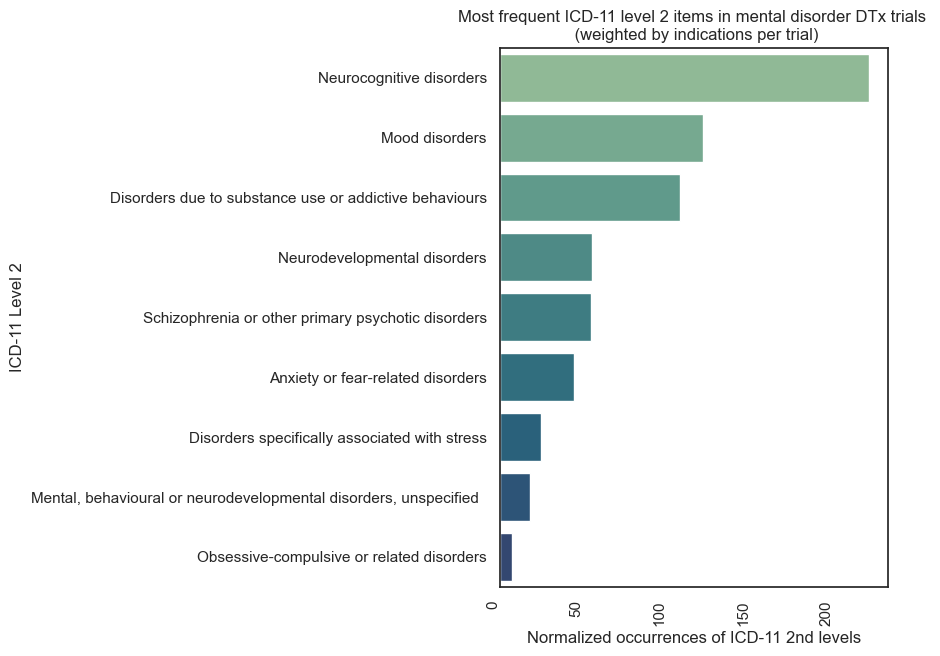

In [66]:
mental_df = condition_occurrences_weighted_df[condition_occurrences_weighted_df["ICD_11_lvl_1"] == "Mental, behavioural or neurodevelopmental disorders (06)"]


mental_ICD_11_series_lvl_2_w = mental_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= mental_ICD_11_series_lvl_2_w.Normalized_Count[:9], 
                  y = mental_ICD_11_series_lvl_2_w.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in mental disorder DTx trials \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 Level 2")


plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__mental_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__mental_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Nervous system

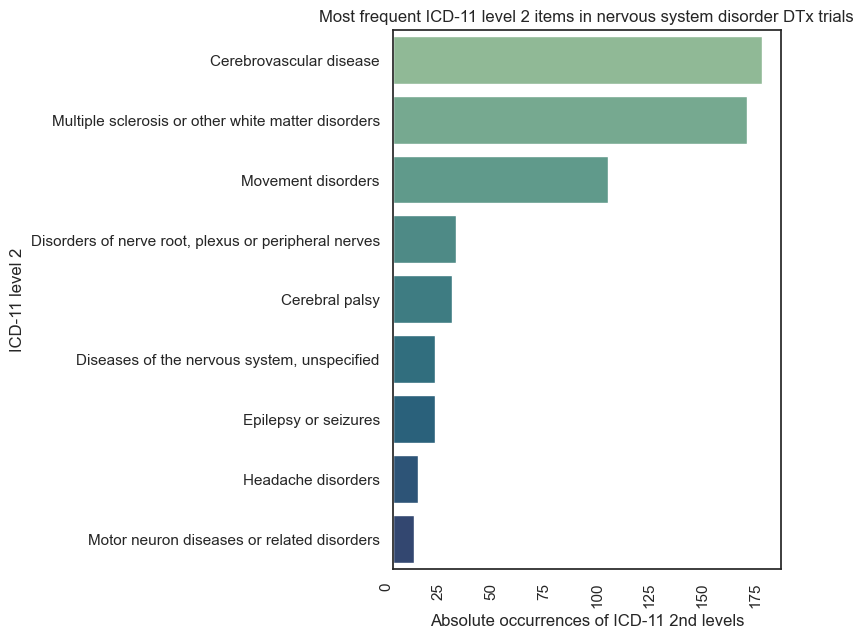

In [67]:
nervous_df = mapped_data[mapped_data["ICD_11_lvl_1"] == "Diseases of the nervous system (08)"]


nervous_ICD_11_series_lvl_2 = nervous_df[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= nervous_ICD_11_series_lvl_2.Count[:9], 
                  y = nervous_ICD_11_series_lvl_2.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in nervous system disorder DTx trials")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")

plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_nervous_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_nervous_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


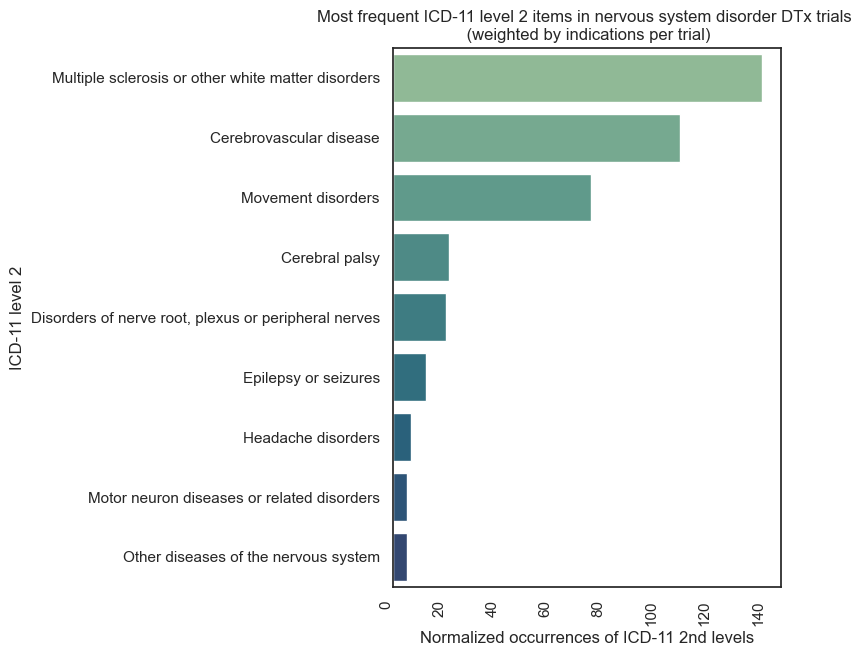

In [68]:
nervous_df = condition_occurrences_weighted_df[condition_occurrences_weighted_df["ICD_11_lvl_1"] == "Diseases of the nervous system (08)"]


nervous_ICD_11_series_lvl_2_w = nervous_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= nervous_ICD_11_series_lvl_2_w.Normalized_Count[:9], 
                  y = nervous_ICD_11_series_lvl_2_w.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in nervous system disorder DTx trials \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")


plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__nervous_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__nervous_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Endocrine Disorders

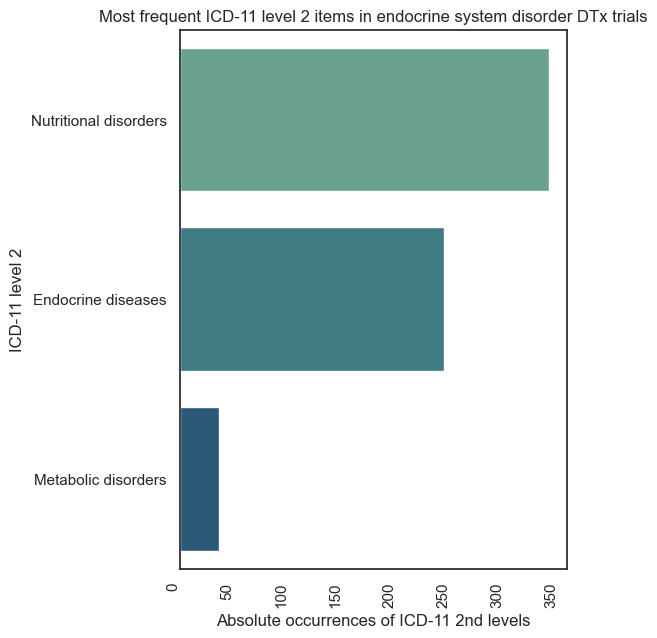

In [69]:
endocrine_df = mapped_data[mapped_data["ICD_11_lvl_1"] == "Endocrine, nutritional or metabolic diseases (05)"]


endocrine_ICD_11_series_lvl_2 = endocrine_df[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= endocrine_ICD_11_series_lvl_2.Count[:9], 
                  y = endocrine_ICD_11_series_lvl_2.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in endocrine system disorder DTx trials")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")

plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_endocrine_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_endocrine_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


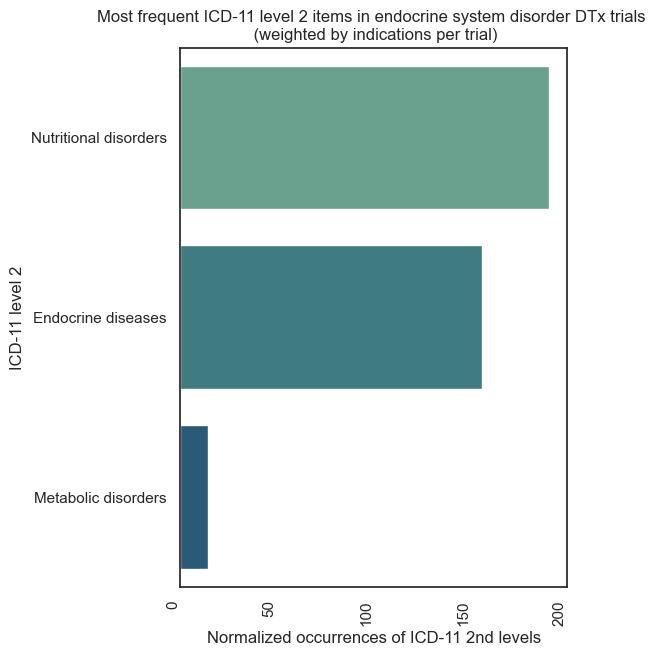

In [70]:
endocrine_df = condition_occurrences_weighted_df[condition_occurrences_weighted_df["ICD_11_lvl_1"] == "Endocrine, nutritional or metabolic diseases (05)"]


endocrine_ICD_11_series_lvl_2_w = endocrine_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= endocrine_ICD_11_series_lvl_2_w.Normalized_Count[:9], 
                  y = endocrine_ICD_11_series_lvl_2_w.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in endocrine system disorder DTx trials \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")


plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__endocrine_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__endocrine_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

### Symptom Data


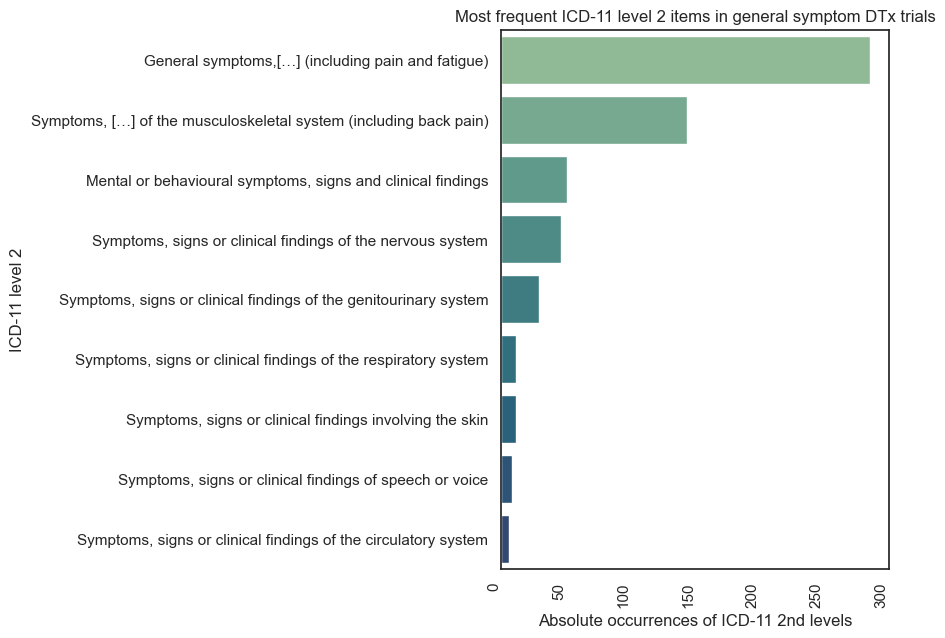

In [71]:
symptom_df = mapped_data[mapped_data["ICD_11_lvl_1"] == "Symptoms, signs or clinical findings, not elsewhere\nclassified (including pain) (21)"]


symptom_ICD_11_series_lvl_2 = symptom_df[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= symptom_ICD_11_series_lvl_2.Count[:9], 
                  y = symptom_ICD_11_series_lvl_2.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in general symptom DTx trials")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")

plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_symptom_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions_symptom_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


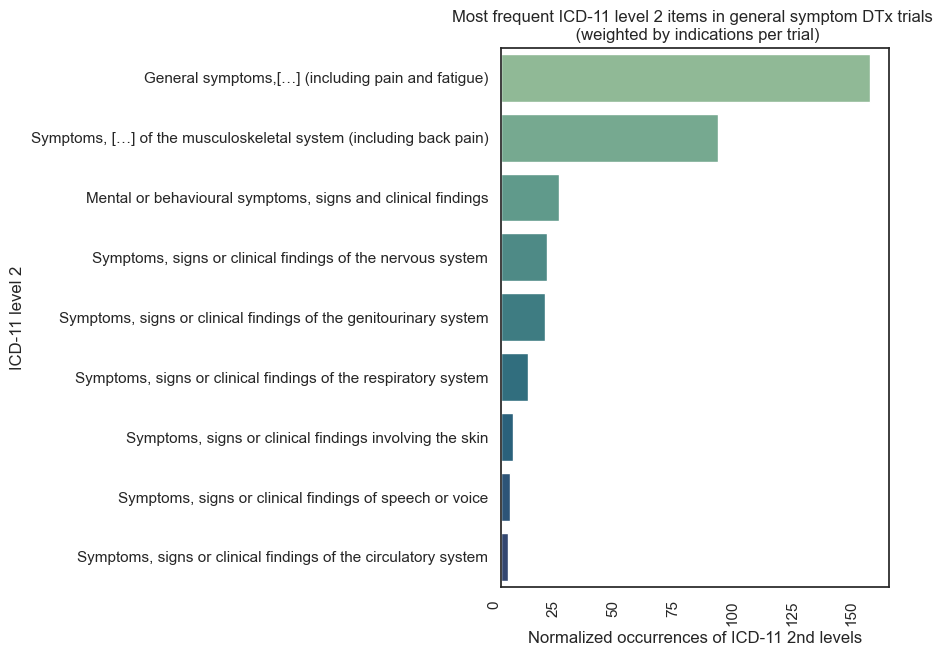

In [72]:
symptom_df = condition_occurrences_weighted_df[condition_occurrences_weighted_df["ICD_11_lvl_1"] == "Symptoms, signs or clinical findings, not elsewhere\nclassified (including pain) (21)"]


symptom_ICD_11_series_lvl_2_w = symptom_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= symptom_ICD_11_series_lvl_2_w.Normalized_Count[:9], 
                  y = symptom_ICD_11_series_lvl_2_w.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in general symptom DTx trials \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")


plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__symptom_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__symptom_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

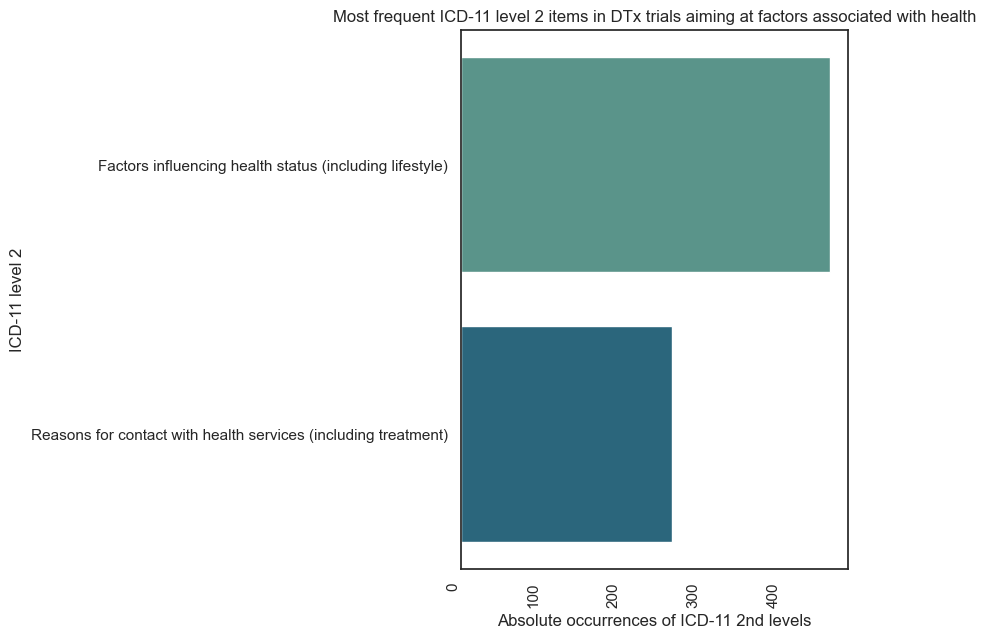

In [73]:
factor_df = mapped_data[mapped_data["ICD_11_lvl_1"] == "Factors influencing health status or contact with health\nservices (including lifestyle factors and medical treatments) (24)"]


factors_ICD_11_series_lvl_2 = factor_df[["Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= factors_ICD_11_series_lvl_2.Count[:9], 
                  y = factors_ICD_11_series_lvl_2.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in DTx trials aiming at factors associated with health")

plt.xlabel("Absolute occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")

plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__factors_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__factors_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()


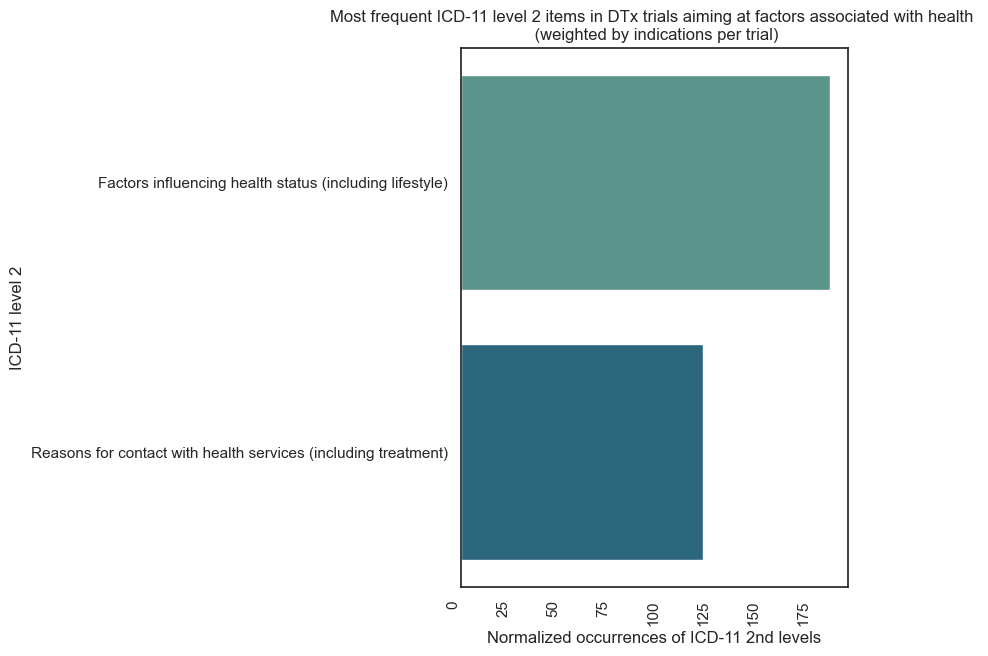

In [74]:
factor_df = condition_occurrences_weighted_df[condition_occurrences_weighted_df["ICD_11_lvl_1"] == "Factors influencing health status or contact with health\nservices (including lifestyle factors and medical treatments) (24)"]


factors_ICD_11_series_lvl_2_w = factor_df[["Normalized_Count", "ICD_11_lvl_2"]].groupby(["ICD_11_lvl_2"]).sum().sort_values(by = "Normalized_Count", ascending = False)

fig = plt.figure(figsize=(5,7))
sns.set_theme(style="white")

ax = sns.barplot( x= factors_ICD_11_series_lvl_2_w.Normalized_Count[:9], 
                  y = factors_ICD_11_series_lvl_2_w.index[:9],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.title("Most frequent ICD-11 level 2 items in DTx trials aiming at factors associated with health \n (weighted by indications per trial)")
plt.xlabel("Normalized occurrences of ICD-11 2nd levels")
plt.ylabel("ICD-11 level 2")


plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__factors_weighted_ICD11_lvl_2.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Subanalysis/Overview_most_frequent_conditions__factors_weighted_ICD11_lvl_2.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()










## Try to map ICD-11 1 Levels longitudinally

### Unweighted

In [75]:
def longitudinal_ICD11_analyzer(start_year = 2005, end_year=2022, ICD_11_level_1 = "Mental, behavioural or neurodevelopmental disorders (06)" ):
    longitudinal_ICD_series = pd.Series(name="ICD_11_level_1_year_count")
    for year in range(start_year, end_year):
        dataframe_year = dataframe[dataframe["start_year"] == year]
        condition_occurrences_year = pd.Series([x for item in dataframe_year.conditions_list for x in item]).value_counts()
        condition_occurrences_year_df = pd.DataFrame(data = 
                                                    {"Yearly_Count": condition_occurrences_year})
        condition_occurrences_year_df = pd.concat([condition_occurrences_year_df,icd_df], axis = 1).dropna(how = "any", subset=["ICD_11_lvl_1", "Yearly_Count"])
        year_count = round(condition_occurrences_year_df[condition_occurrences_year_df["ICD_11_lvl_1"]==ICD_11_level_1].Yearly_Count.sum(),2)
        longitudinal_ICD_series.at[year] = year_count
    return longitudinal_ICD_series




In [76]:
mental_longitudinal_series = longitudinal_ICD11_analyzer()
nervous_longitudinal_series = longitudinal_ICD11_analyzer(ICD_11_level_1 = "Diseases of the nervous system (08)" )
endocrine_longitudinal_series = longitudinal_ICD11_analyzer(ICD_11_level_1 ="Endocrine, nutritional or metabolic diseases (05)")
neoplasms_longitudinal_series = longitudinal_ICD11_analyzer(ICD_11_level_1 ="Neoplasms (02)")
circulatory_longitudinal_series = longitudinal_ICD11_analyzer(ICD_11_level_1 ="Diseases of the circulatory system (11)")
muskoloskeletal_longitudinal_series = longitudinal_ICD11_analyzer(ICD_11_level_1 = "Diseases of the musculoskeletal system\nor connective tissue (15)")

C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\4079985801.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series = pd.Series(name="ICD_11_level_1_year_count")


In [77]:
longitudinal_ICD11_df = pd.DataFrame(data= {"Mental, behavioural or neurodevelopmental disorders (06)":mental_longitudinal_series,
                                            "Diseases of the nervous system (08)":nervous_longitudinal_series,
                                               "Endocrine, nutritional or metabolic diseases (05)":endocrine_longitudinal_series,
                                               "Neoplasms (02)" :neoplasms_longitudinal_series,
                                     #"11 Diseases of the circulatory system" :circulatory_longitudinal_series,
                                     #"15 Diseases of the musculoskeletal system\nor connective tissue":muskoloskeletal_longitudinal_series
                                     })

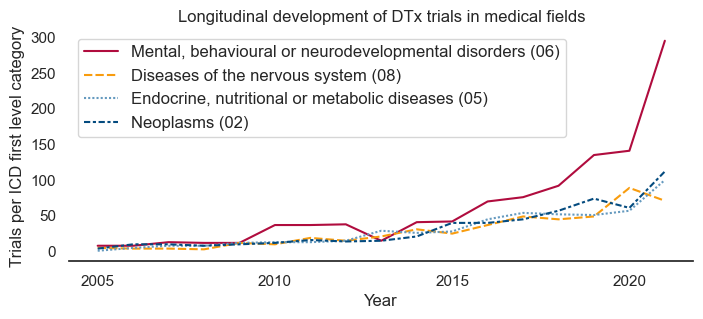

In [78]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =longitudinal_ICD11_df, palette= ["#B00C3E", "#F89C0E","#659ABF", "#044B7F" ] )
plt.ylabel("Trials per ICD first level category")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of DTx trials in medical fields")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "medium", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Longitudinal_ICD_Dev.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Longitudinal_ICD_Dev.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



In [79]:
all_level_ones = mapped_data.ICD_11_lvl_1.unique()
all_cat_df = pd.DataFrame()
for cat in all_level_ones:
    series = longitudinal_ICD11_analyzer(ICD_11_level_1 = cat)
    all_cat_df[cat] = series
    
all_cat_df = all_cat_df[all_cat_df.columns[(all_cat_df>10).any()]].sort_values(by = 2021,axis = 1, ascending = False)



C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\4079985801.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series = pd.Series(name="ICD_11_level_1_year_count")


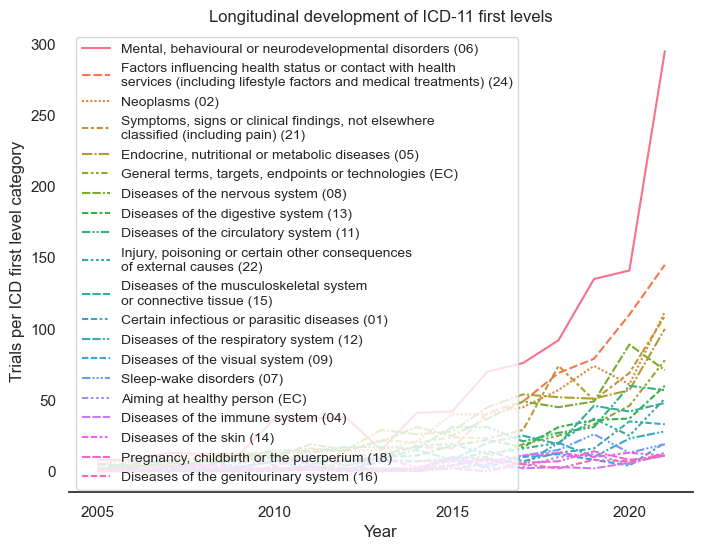

In [80]:
fig = plt.figure(figsize=(8.05,6))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =all_cat_df,  )
plt.ylabel("Trials per ICD first level category")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of ICD-11 first levels")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "small", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Broad_Longitudinal_SubICD_Dev.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Broad_Longitudinal_SubICD_Dev.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



### Weighted

In [81]:
def longitudinal_ICD11_analyzer_w(start_year = 2005, end_year=2022, ICD_11_level_1 = "Mental, behavioural or neurodevelopmental disorders (06)" ):
    longitudinal_ICD_series_w = pd.Series(name="ICD_11_level_1_year_count")
    
    for year in range(start_year, end_year):
        dataframe_year = dataframe[dataframe["start_year"] == year]
        condition_occurrences_weighted_year = pd.Series(dtype="float64")
        for index, row in dataframe_year.iterrows():
            for condition in row["conditions_list"]:
                if condition in condition_occurrences_weighted_year:
                    condition_occurrences_weighted_year.loc[condition] += row["number_of_inds_weight"]
                else:
                    condition_occurrences_weighted_year[condition] = row["number_of_inds_weight"]
            
        condition_occurrences_weighted_year.sort_values(ascending=False, inplace = True)
        condition_occurrences_weighted_year=condition_occurrences_weighted_year.round(2)
        condition_occurrences_weighted_year_df = pd.DataFrame(data = 
                                                    {"Yearly_Count": condition_occurrences_weighted_year})        
        condition_occurrences_weighted_year_df = pd.concat([condition_occurrences_weighted_year_df,icd_df], axis = 1).dropna(how = "any", subset=["ICD_11_lvl_1", "Yearly_Count"])
        year_count = round(condition_occurrences_weighted_year_df[condition_occurrences_weighted_year_df["ICD_11_lvl_1"]==ICD_11_level_1].Yearly_Count.sum(),2)
        longitudinal_ICD_series_w.at[year] = year_count
    return longitudinal_ICD_series_w




In [82]:
mental_longitudinal_series_w = longitudinal_ICD11_analyzer_w()
nervous_longitudinal_series_w = longitudinal_ICD11_analyzer_w(ICD_11_level_1 = "Diseases of the nervous system (08)" )
endocrine_longitudinal_series_w = longitudinal_ICD11_analyzer_w(ICD_11_level_1 ="Endocrine, nutritional or metabolic diseases (05)")
neoplasms_longitudinal_series_w = longitudinal_ICD11_analyzer_w(ICD_11_level_1 ="Neoplasms (02)")


C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\4123047469.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series_w = pd.Series(name="ICD_11_level_1_year_count")


In [83]:
longitudinal_ICD11_df_w = pd.DataFrame(data= {"Mental, behavioural or neurodevelopmental disorders (06)":mental_longitudinal_series_w,
                                            "Diseases of the nervous system (08)":nervous_longitudinal_series_w,
                                               "Endocrine, nutritional or metabolic diseases (05)":endocrine_longitudinal_series_w,
                                               "Neoplasms (02)" :neoplasms_longitudinal_series_w})


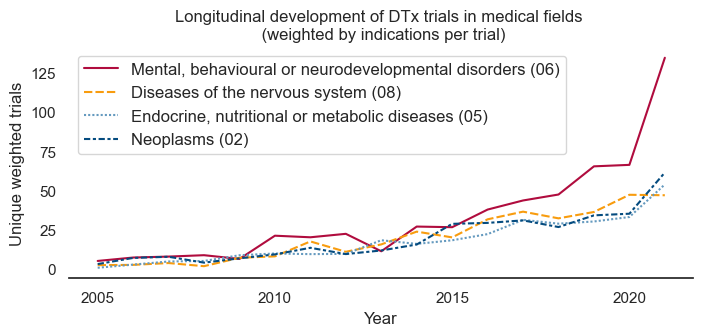

In [84]:
fig = plt.figure(figsize=(8.05,3))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =longitudinal_ICD11_df_w, palette= ["#B00C3E", "#F89C0E","#659ABF", "#044B7F" ] )
plt.ylabel("Unique weighted trials")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of DTx trials in medical fields \n (weighted by indications per trial)")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "medium", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Longitudinal_ICD_Dev_weighted.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Longitudinal_ICD_Dev_weighted.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



In [85]:
all_level_ones = mapped_data.ICD_11_lvl_1.unique()
all_cat_df_w = pd.DataFrame()
for cat in all_level_ones:
    series = longitudinal_ICD11_analyzer_w(ICD_11_level_1 = cat)
    all_cat_df_w[cat] = series
    
all_cat_df_w


C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\4123047469.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series_w = pd.Series(name="ICD_11_level_1_year_count")


Endocrine, nutritional or metabolic diseases (05)  \
2005                                               1.00   
2006                                               3.00   
2007                                               4.99   
2008                                               5.32   
2009                                               8.95   
2010                                              10.08   
2011                                               9.67   
2012                                               9.83   
2013                                              18.50   
2014                                              16.18   
2015                                              18.49   
2016                                              22.40   
2017                                              31.49   
2018                                              29.06   
2019                                              30.45   
2020                                              33.30   
2021                                              54.02   

      Diseases of the nervous system (08)  Neoplasms (02)  \
2005                                 2.66            3.33   
2006                                 2.83            7.25   
2007                                 4.00            7.99   
2008                                 2.00            4.25   
2009                                 7.35            6.99   
2010                                 8.25            9.50   
2011                                17.75           13.70   
2012                                11.16            9.70   
2013                                15.86           12.00   
2014                                23.99           15.78   
2015                                20.32           28.94   
2016                                31.82           29.55   
2017                                36.70           31.15   
2018                                32.44           26.91   
2019                                36.49           34.34   
2020                                47.44           35.39   
2021                                47.14           61.60   

      Mental, behavioural or neurodevelopmental disorders (06)  \
2005                                               5.33          
2006                                               7.50          
2007                                               8.11          
2008                                               8.99          
2009                                               6.61          
2010                                              21.40          
2011                                              20.39          
2012                                              22.59          
2013                                              11.49          
2014                                              27.21          
2015                                              26.81          
2016                                              38.03          
2017                                              43.82          
2018                                              47.61          
2019                                              65.54          
2020                                              66.48          
2021                                             134.65          

      Aiming at healthy person (EC)  Diseases of the circulatory system (11)  \
2005                           0.00                                     3.16   
2006                           1.00                                     2.50   
2007                           0.00                                     4.16   
2008                           1.50                                     3.40   
2009                           0.33                                     6.83   
2010                           6.67                                     9.66   
2011                           2.25                                    10.09   
2012           

In [86]:
all_cat_df_w = all_cat_df_w[all_cat_df_w.columns[(all_cat_df_w>4).any()]].sort_values(by = 2021,axis = 1, ascending = False)


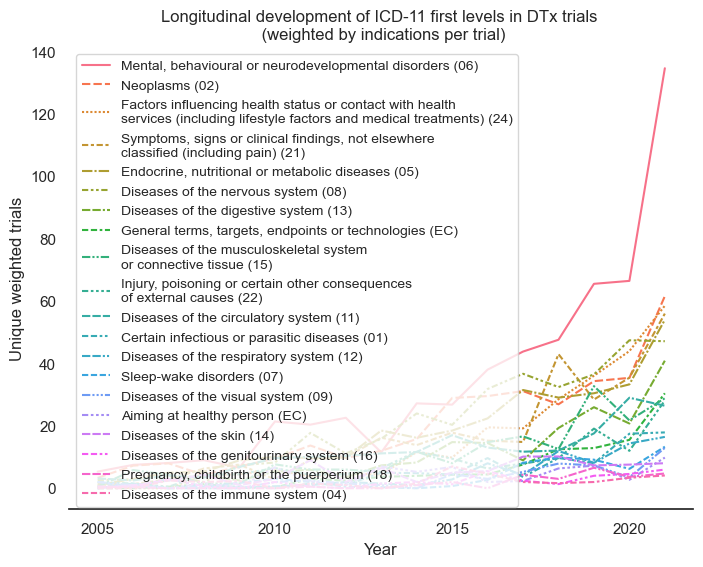

In [87]:
fig = plt.figure(figsize=(8.05,6))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =all_cat_df_w,  )
plt.ylabel("Unique weighted trials")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of ICD-11 first levels in DTx trials \n (weighted by indications per trial)")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "small", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Broad_Longitudinal_SubICD_Dev_weighted.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Broad_Longitudinal_SubICD_Dev_weighted.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



### Mental Longitudinal Breakdown

In [88]:
def longitudinal_ICD11_2_analyzer_w(start_year = 2005, end_year=2022, ICD_11_level_2 = "Mental, behavioural or neurodevelopmental disorders (06)" ):
    longitudinal_ICD_series_w = pd.Series(name="ICD_11_level_2_year_count")
    
    for year in range(start_year, end_year):
        dataframe_year = dataframe[dataframe["start_year"] == year]
        condition_occurrences_weighted_year = pd.Series(dtype="float64")
        for index, row in dataframe_year.iterrows():
            for condition in row["conditions_list"]:
                if condition in condition_occurrences_weighted_year:
                    condition_occurrences_weighted_year.loc[condition] += row["number_of_inds_weight"]
                else:
                    condition_occurrences_weighted_year[condition] = row["number_of_inds_weight"]
            
        condition_occurrences_weighted_year.sort_values(ascending=False, inplace = True)
        condition_occurrences_weighted_year=condition_occurrences_weighted_year.round(2)
        condition_occurrences_weighted_year_df = pd.DataFrame(data = 
                                                    {"Yearly_Count": condition_occurrences_weighted_year})        
        condition_occurrences_weighted_year_df = pd.concat([condition_occurrences_weighted_year_df,icd_df], axis = 1).dropna(how = "any", subset=["ICD_11_lvl_1", "Yearly_Count"])
        year_count = round(condition_occurrences_weighted_year_df[condition_occurrences_weighted_year_df["ICD_11_lvl_2"]==ICD_11_level_2].Yearly_Count.sum(),2)
        longitudinal_ICD_series_w.at[year] = year_count
    return longitudinal_ICD_series_w




In [89]:
all_mentals = mapped_data[mapped_data["ICD_11_lvl_1"] == "Mental, behavioural or neurodevelopmental disorders (06)"].ICD_11_lvl_2.unique()
mental_df = pd.DataFrame()
for mental in all_mentals:
    series = longitudinal_ICD11_2_analyzer_w(ICD_11_level_2 = mental)
    mental_df[mental] = series

mental_df = mental_df[mental_df.columns[(mental_df>3).any()]].sort_values(by = 2021,axis = 1, ascending = False)

C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\937895458.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series_w = pd.Series(name="ICD_11_level_2_year_count")


In [90]:
mental_df.rename(columns = {"Mental, behavioural or neurodevelopmental disorders, unspecified  " : "Mental, behavioural or neurodevelopmental disorders,\n unspecified"}, inplace = True,)

In [91]:
mental_df.columns

Index(['Neurocognitive disorders',
       'Disorders due to substance use or addictive behaviours',
       'Mood disorders', 'Neurodevelopmental disorders',
       'Anxiety or fear-related disorders',
       'Schizophrenia or other primary psychotic disorders',
       'Disorders specifically associated with stress',
       'Obsessive-compulsive or related disorders',
       'Mental, behavioural or neurodevelopmental disorders,\n unspecified'],
      dtype='object')

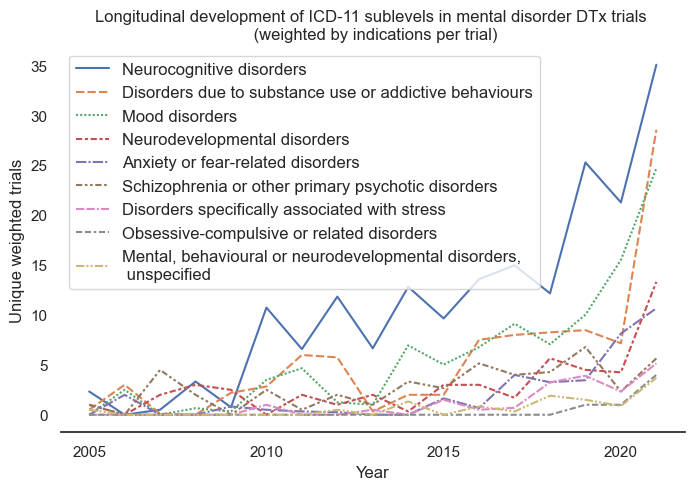

In [92]:
fig = plt.figure(figsize=(8.05,5))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =mental_df,  )
plt.ylabel("Unique weighted trials")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of ICD-11 sublevels in mental disorder DTx trials \n (weighted by indications per trial)")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "medium", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Mental_Longitudinal_SubICD_Dev_weighted.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Mental_Longitudinal_SubICD_Dev_weighted.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



In [93]:
def longitudinal_ICD11_lvl_2_analyzer(start_year = 2005, end_year=2022, ICD_11_level_2 = "Mental, behavioural or neurodevelopmental disorders (06)" ):
    longitudinal_ICD_series = pd.Series(name="ICD_11_level_2_year_count")
    for year in range(start_year, end_year):
        dataframe_year = dataframe[dataframe["start_year"] == year]
        condition_occurrences_year = pd.Series([x for item in dataframe_year.conditions_list for x in item]).value_counts()
        condition_occurrences_year_df = pd.DataFrame(data = 
                                                    {"Yearly_Count": condition_occurrences_year})
        condition_occurrences_year_df = pd.concat([condition_occurrences_year_df,icd_df], axis = 1).dropna(how = "any", subset=["ICD_11_lvl_1", "Yearly_Count"])
        year_count = round(condition_occurrences_year_df[condition_occurrences_year_df["ICD_11_lvl_2"]==ICD_11_level_2].Yearly_Count.sum(),2)
        longitudinal_ICD_series.at[year] = year_count
    return longitudinal_ICD_series




In [94]:
all_mentals = mapped_data[mapped_data["ICD_11_lvl_1"] == "Mental, behavioural or neurodevelopmental disorders (06)"].ICD_11_lvl_2.unique()
mental_df = pd.DataFrame()
for mental in all_mentals:
    series = longitudinal_ICD11_lvl_2_analyzer(ICD_11_level_2 = mental)
    mental_df[mental] = series

mental_df = mental_df[mental_df.columns[(mental_df>3).any()]].sort_values(by = 2021,axis = 1, ascending = False)

C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\3123479115.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_ICD_series = pd.Series(name="ICD_11_level_2_year_count")


In [95]:
mental_df.rename(columns = {"Mental, behavioural or neurodevelopmental disorders, unspecified  " : "Mental, behavioural or neurodevelopmental disorders,\n unspecified"}, inplace = True,)

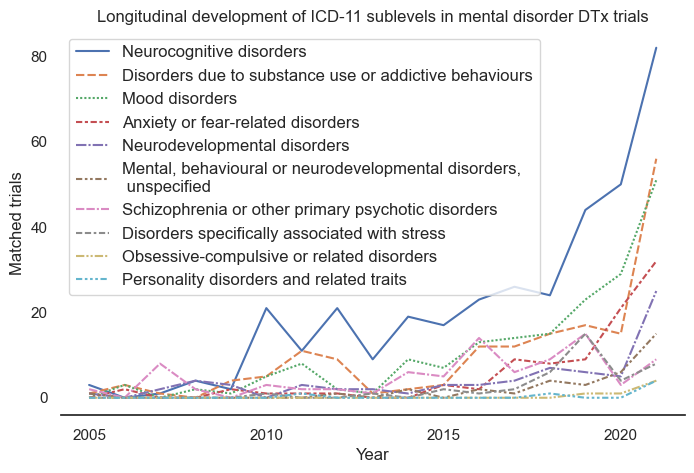

In [96]:
fig = plt.figure(figsize=(8.05,5))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =mental_df,  )
plt.ylabel("Matched trials")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of ICD-11 sublevels in mental disorder DTx trials")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "medium", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Mental_Longitudinal_SubICD_Dev_.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Longitudinal_ICD_Analysis/Mental_Longitudinal_SubICD_Dev_.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()



# Analyze Locations and Country Composition

## Overall

In [97]:
country_count = pd.Series([val for sublist in dataframe.Countries for val in sublist]).value_counts()
country_count_from2005 = pd.Series([val for sublist in dataframe[dataframe["start_year"].between(2005,2022)].Countries for val in sublist]).value_counts() 




In [98]:

country_dtx_df = pd.DataFrame(country_count, columns = ["dtx_count" ]).reset_index().rename({"index":"country"}, axis = 1)
country_dtx_df = country_dtx_df[country_dtx_df["country"] != "nan"].reset_index(drop=True)
country_dtx_df.replace({" Islamic Republic of":"Iran, Islamic Republic of",
                                   " The Former Yugoslav Republic of" : " North Macedonia",
                                   " The Democratic Republic of the" : "Congo, The Democratic Republic of the",
                                   " Republic of" : "Korea, Republic of",
                                   "NaN":np.nan}, inplace = True)


country_dtx_from2005_df = pd.DataFrame(country_count_from2005, columns = ["dtx_count" ]).reset_index().rename({"index":"country"}, axis = 1)
country_dtx_from2005_df = country_dtx_from2005_df[country_dtx_from2005_df["country"] != "nan"].reset_index(drop=True)
country_dtx_from2005_df.replace({" Islamic Republic of":"Iran, Islamic Republic of",
                                   " The Former Yugoslav Republic of" : "North Macedonia",
                                   " The Democratic Republic of the" : "Congo, The Democratic Republic of the",
                                   " Republic of" : "Korea, Republic of",
                                   "NaN":np.nan}, inplace = True)
country_dtx_from2005_df["percentage_of_all_trials"] = country_dtx_from2005_df.dtx_count/5776*100
country_dtx_from2005_df.to_excel("country_dtx_from2005_df.xlsx")

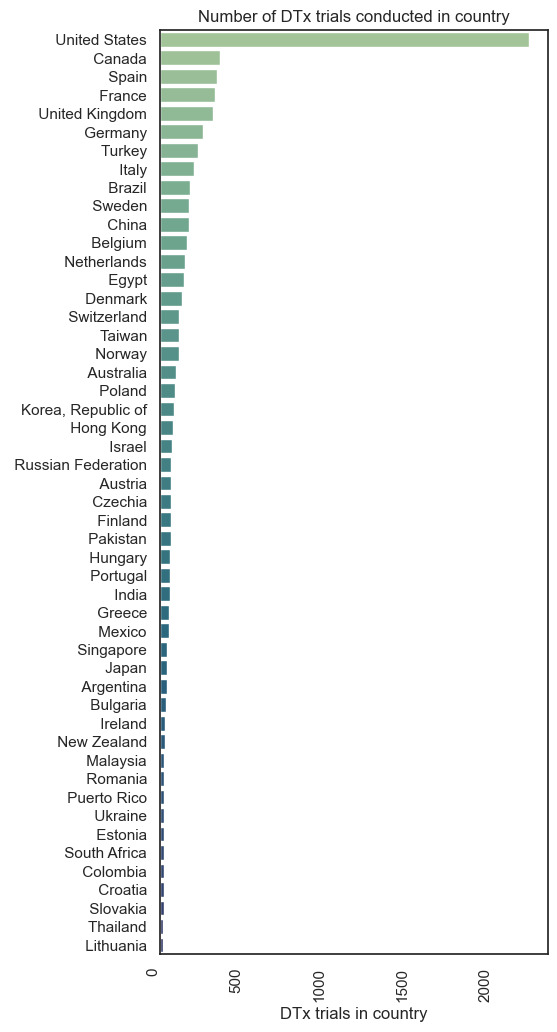

In [99]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot(  x= country_dtx_df.dtx_count[:50], 
                  y = country_dtx_df.country[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.xlabel("DTx trials in country")
ax.set(ylabel=None)

plt.title("Number of DTx trials conducted in country")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


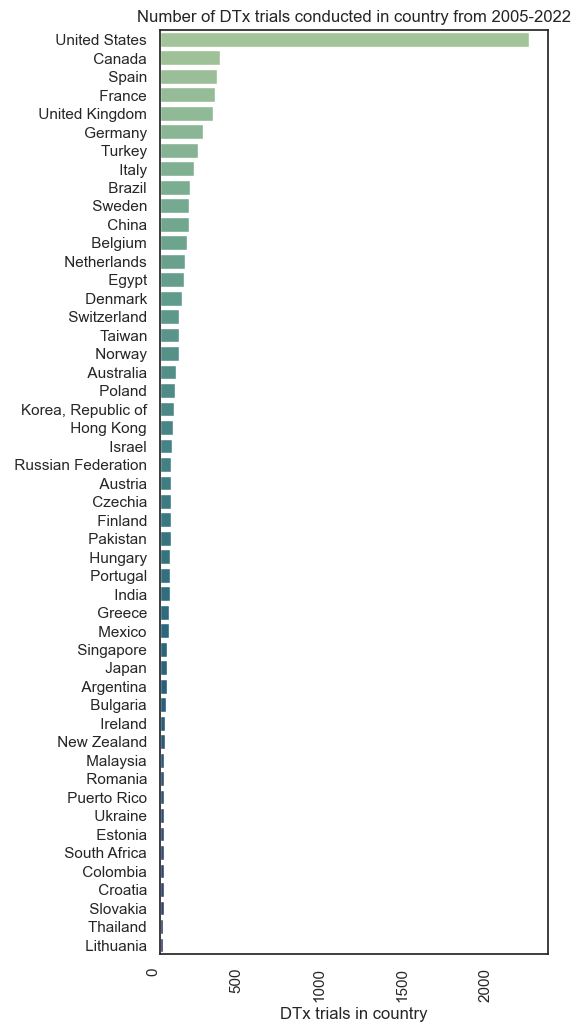

In [100]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= country_dtx_from2005_df.dtx_count[:50], 
                  y = country_dtx_from2005_df.country[:50],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.xlabel("DTx trials in country")
ax.set(ylabel=None)

plt.title("Number of DTx trials conducted in country from 2005-2022")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2005.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2005.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


In [101]:
country_dtx_from2005_df.dtx_count[:20].sum()

5909

In [102]:
from api_core_functions import query_ctgov_field
def calculate_all_trials_per_country(country):
    search_string = f"SEARCH[Location](AREA[LocationCountry]{country}) AND AREA[StartDate]RANGE[01/01/2005, 31/12/2022]"
    try:
        all_trials = query_ctgov_field(search_string=search_string)
        return len(all_trials)
    except Exception as e:
        print(e)
        return np.nan

country_dtx_from2005_df["all_trials"] = country_dtx_from2005_df["country"].apply(calculate_all_trials_per_country)
country_dtx_from2005_df["trial_rate"] = round(country_dtx_from2005_df["dtx_count"]/country_dtx_from2005_df["all_trials"]*100,2 )

'ascii' codec can't encode character '\xf4' in position 73: ordinal not in range(128)


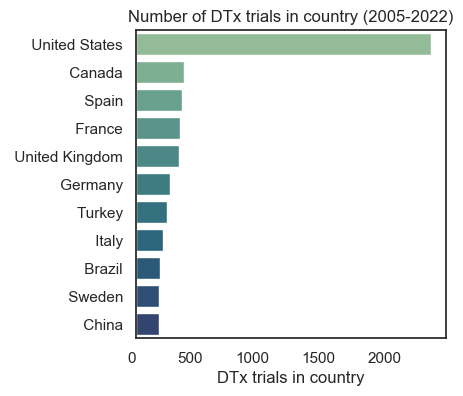

In [103]:
fig = plt.figure(figsize=(4,4))
sns.set_theme(style="white")

ax = sns.barplot( x= country_dtx_from2005_df.dtx_count[:11], 
                  y = country_dtx_from2005_df.country[:11],
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=0, ha='right')
plt.xlabel("DTx trials in country")
ax.set(ylabel=None)

plt.title("Number of DTx trials in country (2005-2022)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2005_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2005_small.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


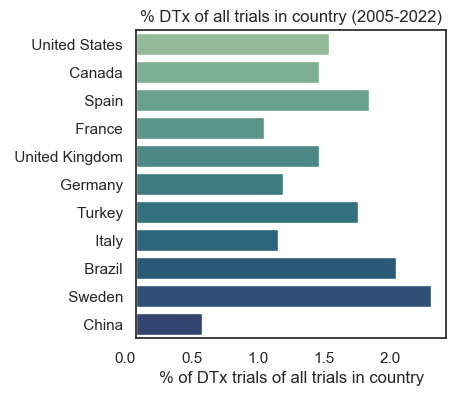

In [104]:
fig = plt.figure(figsize=(4,4))
sns.set_theme(style="white")

ax = sns.barplot( data = country_dtx_from2005_df.iloc[:11,:],
                 x= "trial_rate", 
                  y = "country",
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=0, ha='right')
plt.xlabel("% of DTx trials of all trials in country")
ax.set(ylabel=None)

plt.title("% DTx of all trials in country (2005-2022)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_from_2005_trial_rate_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_from_2005_trial_rate_small.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


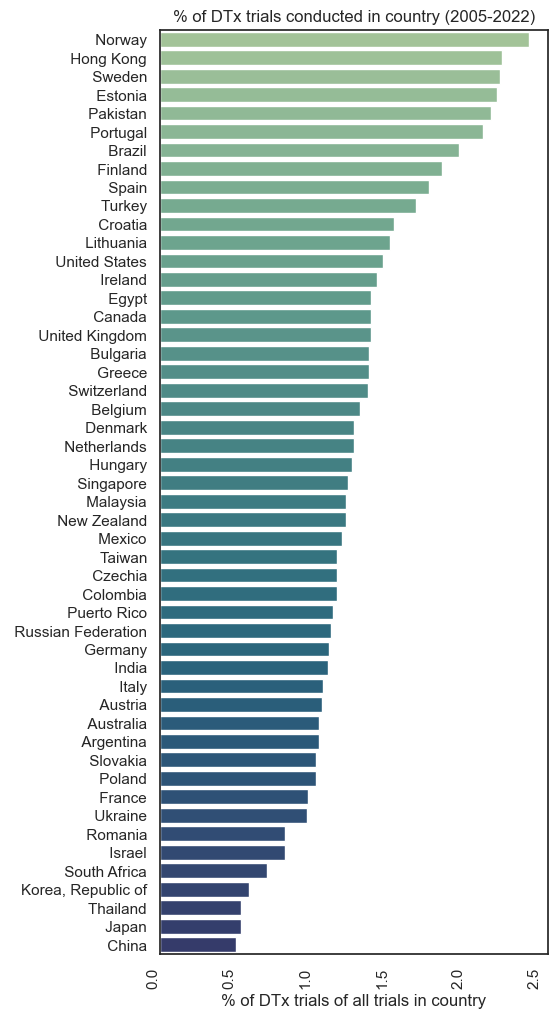

In [105]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( data = country_dtx_from2005_df.iloc[:50,:].sort_values("trial_rate", ascending=False),
                 x= "trial_rate", 
                  y = "country",
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.xlabel("% of DTx trials of all trials in country")
ax.set(ylabel=None)

plt.title("% of DTx trials conducted in country (2005-2022)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_from_2005_trial_rate.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_from_2005_trial_rate.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


## In 2021

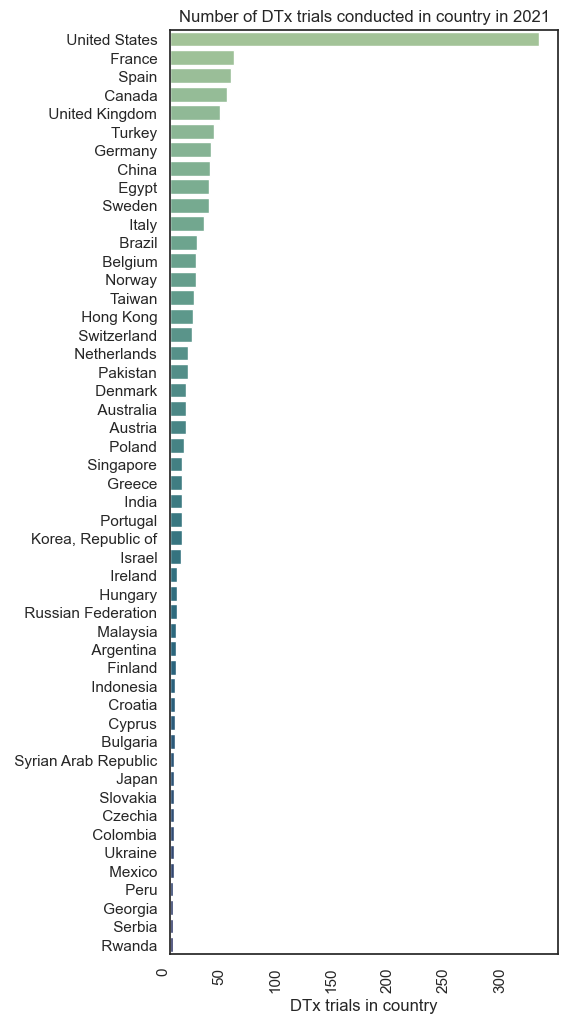

In [106]:
country_count_2021 = pd.Series([val for sublist in dataframe[dataframe["start_year"]==2021].Countries for val in sublist]).value_counts() 


country_dtx_2021_df = pd.DataFrame(country_count_2021, columns = ["dtx_count" ]).reset_index().rename({"index":"country"}, axis = 1)
country_dtx_2021_df = country_dtx_2021_df[country_dtx_2021_df["country"] != "nan"].reset_index(drop=True)
country_dtx_2021_df.replace({" Islamic Republic of":"Iran, Islamic Republic of",
                                   " The Former Yugoslav Republic of" : " North Macedonia",
                                   " The Democratic Republic of the" : "Congo, The Democratic Republic of the",
                                   " Republic of" : "Korea, Republic of",
                                   "NaN":np.nan}, inplace = True)




fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( x= country_dtx_2021_df.dtx_count[:50], 
                  y = country_dtx_2021_df.country[:50],
                  palette = "crest",
                  orient = "h"
)
plt.xticks(rotation=90, ha='right')
plt.xlabel("DTx trials in country")
ax.set(ylabel=None)

plt.title("Number of DTx trials conducted in country in 2021")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2021.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2021.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


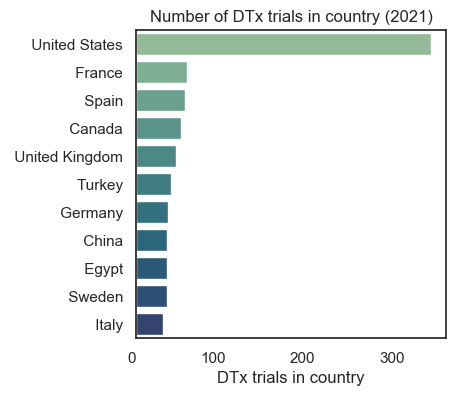

In [107]:
fig = plt.figure(figsize=(4,4))
sns.set_theme(style="white")

ax = sns.barplot( x= country_dtx_2021_df.dtx_count[:11], 
                  y = country_dtx_2021_df.country[:11],
                  palette = "crest",
                  orient = "h"
)
plt.xticks(rotation=0, ha='right')
plt.xlabel("DTx trials in country")
ax.set(ylabel=None)

plt.title("Number of DTx trials in country (2021)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2021_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_site_countries_2021_small.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


In [108]:
def calculate_all_trials_per_country(country):
    search_string = f"SEARCH[Location](AREA[LocationCountry]{country}) AND AREA[StartDate]RANGE[01/01/2021, 31/12/2021]"
    try:
        all_trials = query_ctgov_field(search_string=search_string)
        return len(all_trials)
    except Exception as e:
        print(e)
        return np.nan

country_dtx_2021_df["all_trials"] = country_dtx_2021_df["country"].apply(calculate_all_trials_per_country)
country_dtx_2021_df["trial_rate"] = round(country_dtx_2021_df["dtx_count"]/country_dtx_2021_df["all_trials"]*100,2 )


'ascii' codec can't encode character '\xf4' in position 73: ordinal not in range(128)


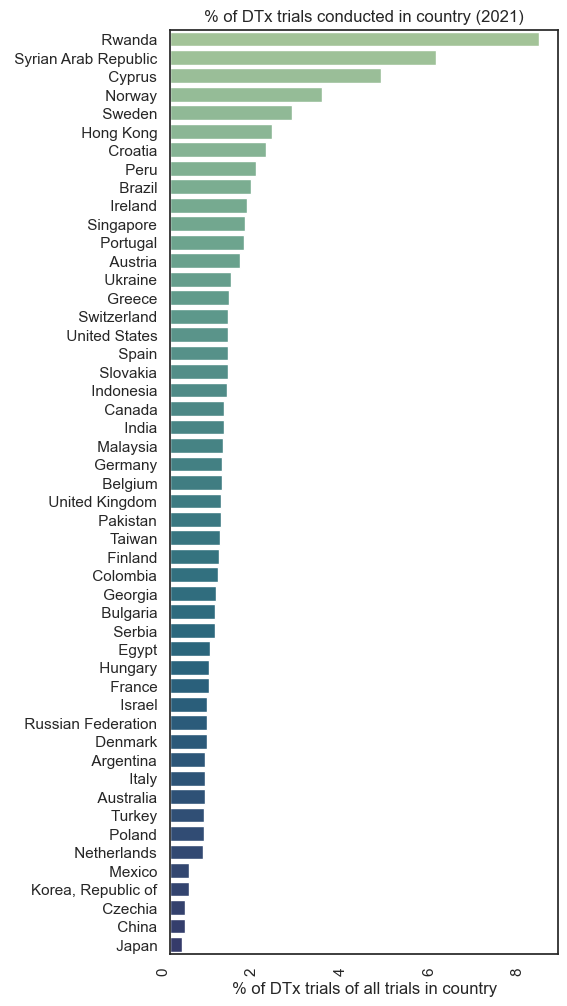

In [109]:
fig = plt.figure(figsize=(5,12))
sns.set_theme(style="white")

ax = sns.barplot( data = country_dtx_2021_df.iloc[:50,:].sort_values("trial_rate", ascending=False),
                 x= "trial_rate", 
                  y = "country",
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=90, ha='right')
plt.xlabel("% of DTx trials of all trials in country")
ax.set(ylabel=None)

plt.title("% of DTx trials conducted in country (2021)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_2021_trial_rate.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_2021_trial_rate.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


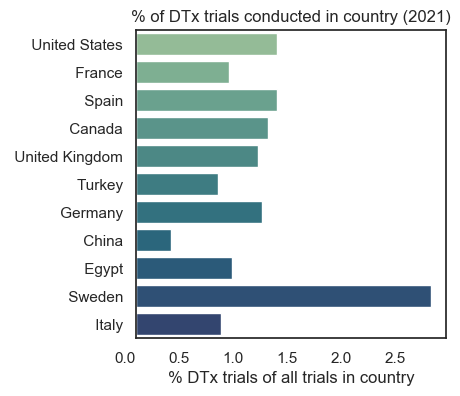

In [110]:
fig = plt.figure(figsize=(4,4))
sns.set_theme(style="white")

ax = sns.barplot( data = country_dtx_2021_df.iloc[:11,:],
                 x= "trial_rate", 
                  y = "country",
                  palette = "crest",
                  orient = "h"

)
plt.xticks(rotation=0, ha='right')
plt.xlabel("% DTx trials of all trials in country")
ax.set(ylabel=None)

plt.title("% of DTx trials conducted in country (2021)")
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_2021_trial_rate_small.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Overview_study_Dtx_2021_trial_rate_small.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()


## Logging longitudinal country trends

In [111]:
def longitudinal_country_analyzer(start_year = 2005, end_year=2022, country = " Germany" ):
    longitudinal_country_series = pd.Series(name="Country_count")
    for year in range(start_year, end_year):
        country_count = pd.Series([val for sublist in dataframe[dataframe["start_year"]==year].Countries for val in sublist]).value_counts() 
        country_dtx_df = pd.DataFrame(country_count, columns = ["dtx_count" ]).reset_index().rename({"index":"country"}, axis = 1)
        country_dtx_df = country_dtx_df[country_dtx_df["country"] != "nan"].reset_index(drop=True)
        country_dtx_df.replace({" Islamic Republic of":"Iran, Islamic Republic of",
                                        " The Former Yugoslav Republic of" : " North Macedonia",
                                        " The Democratic Republic of the" : "Congo, The Democratic Republic of the",
                                        " Republic of" : "Korea, Republic of",
                                        "NaN":np.nan}, inplace = True)
        if country_dtx_df[country_dtx_df["country"]== country].dtx_count.empty:
            longitudinal_country_series.at[year] = np.nan
            continue
        year_count = country_dtx_df[country_dtx_df["country"]== country].dtx_count.values[0]
        longitudinal_country_series.at[year] = year_count
    return longitudinal_country_series




In [112]:
country_count = pd.Series([val for sublist in dataframe.Countries for val in sublist]).value_counts() 
country_dtx_df = pd.DataFrame(country_count, columns = ["dtx_count" ]).reset_index().rename({"index":"country"}, axis = 1)
country_dtx_df = country_dtx_df[country_dtx_df["country"] != "nan"].reset_index(drop=True)
country_dtx_df.replace({" Islamic Republic of":"Iran, Islamic Republic of",
                                " The Former Yugoslav Republic of" : " North Macedonia",
                                " The Democratic Republic of the" : "Congo, The Democratic Republic of the",
                                " Republic of" : "Korea, Republic of",
                                "NaN":np.nan}, inplace = True)

all_countries = country_dtx_df.country.unique()

In [113]:
country_df = pd.DataFrame()
for country in all_countries:
    series = longitudinal_country_analyzer(country = country)
    country_df[country] = series

country_df = country_df[country_df.columns[(country_df>25).any()]].sort_values(by = 2021,axis = 1, ascending = False)


C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\186600618.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  longitudinal_country_series = pd.Series(name="Country_count")


C:\Users\larsm\AppData\Local\Temp\ipykernel_9840\1556015359.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  country_df[country] = series


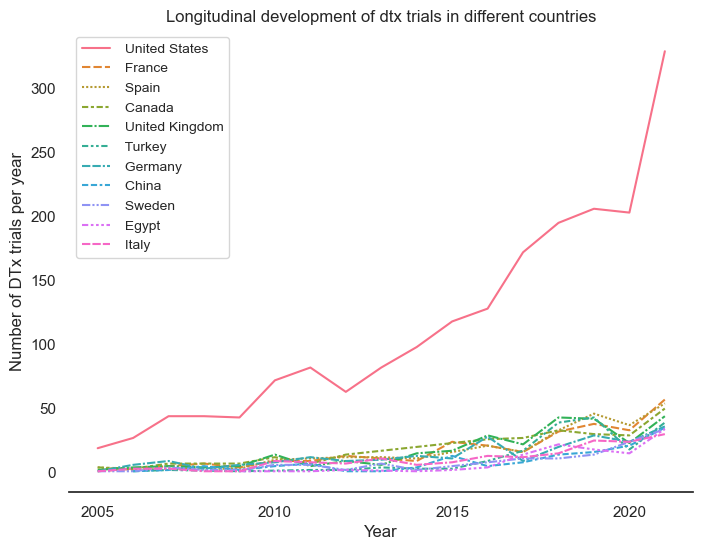

In [114]:
fig = plt.figure(figsize=(8.05,6))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =country_df,  )
plt.ylabel("Number of DTx trials per year")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development of dtx trials in different countries")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "small", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Longitudinal_Country_Development.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Longitudinal_Country_Development.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()



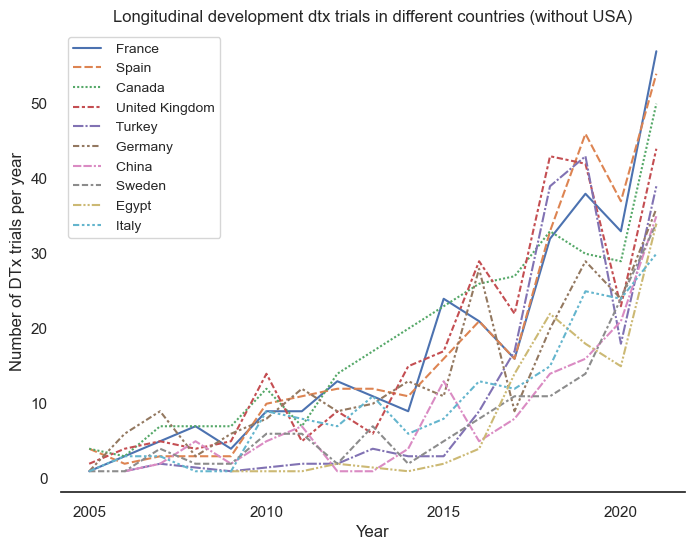

In [115]:
fig = plt.figure(figsize=(8.05,6))
sns.set_theme(style="white")

fig2 = sns.lineplot(  data =country_df.drop(" United States", axis =1),  )
plt.ylabel("Number of DTx trials per year")
plt.xlabel("Year")

sns.despine(left = True)
plt.title("Longitudinal development dtx trials in different countries (without USA)")
plt.xticks([2005,2010,2015,2020])
fig2.legend(fontsize = "small", frameon = True, loc = "upper left")

plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Longitudinal_Country_Development_without US.svg', dpi = 600, bbox_inches = 'tight')
plt.savefig('Graphs/CTGOV_DTX/Country_Analysis/Longitudinal_Country_Development_without US.tiff', dpi = 600, bbox_inches = 'tight')


plt.show()

